Related :
database table: age_food_group_recommended_amount_adjusted    
stored procedures: 
    adjusted_gms_age_food_group_recommended_amount
    multi_day_get_food_group_based_dietary_intake_by_participants

Cup http://dish.allrecipes.com/cup-to-gram-conversions/
More Cup and grams conversion references are provided in the stored procedures as well

In [1]:
# notes on regenerating some of the core data can be found near the end. Also, reports can be checked for other details

In [5]:
# PCA section, Correlation, Heatmaps,  plots can be seen to be the most important
# Might have to adjust/improve my conclusions from the plots in future work

In [6]:
# Target variable ESRD patients: Avg. Annual Mortality rates is given the most importance

#Potential Others:   
# One another target variable is: ESRD patients: Total (or %) deaths for target year
# Other target variables: Dialysis patients: Total (or %) deaths for target year

In [7]:
# For plotting, import libraries

from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Core Input data File: Food Group

mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv

Intake data and recommended data

Recommended data:  

Removed (no longer relevant): The ones with format: From: Recommended Vegetable Intake and To: Recommended Vegetable Intake: health.gov recommendation data (age group based) is distributed to each age then took average using age groups as used by USRDS

Relevant: The ones with format: vegetables_recommended_high and vegetables_recommended_low: health.gov recommendation data (age group based) is mapped to ages (rather than dividing and distributing) then regrouped using USRDS age groups. To mention: health.gov and USRDS provided aggregated data using different age groups. Hence, such approaches were taken


In [8]:
# data exploration
import pandas as pd
df = pd.read_csv('mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
df.head()

age_from  age_to   Gender  vegetables_recommended_low  \
0         0       4  Neutral                      168.75   
1         5       9  Neutral                      232.50   
2        10      13  Neutral                      262.50   
3        14      17  Neutral                      375.00   
4        18      21  Neutral                      403.13   

   vegetables_recommended_high  Actual Vegetable Intake  \
0                        262.5                   113.08   
1                        390.0                   136.70   
2                        450.0                   150.48   
3                        525.0                   154.13   
4                        525.0                   185.35   

   protein_recommended_low  protein_recommended_high  Actual Protein Intake  \
0                    63.79                122.259375                 125.47   
1                    93.55                154.507500                 179.64   
2                   127.58                177.187500                 215.61   
3                   148.84                191.362500                 237.36   
4                   159.47                191.362500                 279.75   

   grains_recommended_low  \
0                   92.14   
1                  119.07   
2                  141.75   
3                  170.10   
4                  191.36   

                            ...                            \
0                           ...                             
1                           ...                             
2                           ...                             
3                           ...                             
4                           ...                             

   sugars_recommended_low  sugars_recommended_high  Actual Added Sugars Taken  \
0                   23.40                   28.600                       32.5   
1                   31.50                   38.500                       39.0   
2                   40.50                   49.500                       52.0   
3                   50.63                   61.875                       65.0   
4                   56.25                   68.750                       78.0   

   oils_recommended_low  oils_recommended_high  \
0                 15.38                  18.75   
1                 17.10                  26.70   
2                 19.50                  31.50   
3                 25.50                  40.50   
4                 26.63                  38.25   

   Avg Fats oils and salad dressings taken  \
0                                     8.77   
1                                    14.52   
2                                    21.31   
3                                    24.30   
4                                    25.54   

   ESRD patients: Avg. Annual Mortality rates  \
0                                       4.390   
1                                       0.925   
2                                       0.505   
3                                       0.565   
4                                       1.450   

   Dialysis patients: Avg. Annual Mortality rates  \
0                                           6.665   
1                                           4.065   
2                                           1.115   
3                                           1.215   
4                                           3.130   

   ESRD patients: Total (or %) deaths for target year  \
0                                               32.0    
1                                               12.5    
2                                                8.0    
3                                               11.5    
4                                               57.0    

   Dialysis patients: Total (or %) deaths for target year  
0                                               27.5       
1                                                8.0       
2                                                3.5       
3       

In [9]:
df.describe()

age_from     age_to  vegetables_recommended_low  \
count  18.000000  18.000000                   18.000000   
mean   38.833333  42.555556                  349.687778   
std    25.011174  25.270821                   69.511470   
min     0.000000   4.000000                  168.750000   
25%    19.000000  21.750000                  337.500000   
50%    37.500000  41.500000                  345.000000   
75%    58.750000  62.750000                  412.500000   
max    80.000000  84.000000                  412.500000   

       vegetables_recommended_high  Actual Vegetable Intake  \
count                    18.000000                18.000000   
mean                    484.583333               213.050000   
std                      65.390512                45.107202   
min                     262.500000               113.080000   
25%                     487.500000               193.067500   
50%                     491.250000               227.645000   
75%                     525.000000               244.740000   
max                     525.000000               255.580000   

       protein_recommended_low  protein_recommended_high  \
count                18.000000                 18.000000   
mean                143.759444                180.435938   
std                  25.457548                 16.662609   
min                  63.790000                122.259375   
25%                 148.840000                184.275000   
50%                 148.840000                184.275000   
75%                 155.930000                185.338125   
max                 163.010000                191.362500   

       Actual Protein Intake  grains_recommended_low  grains_recommended_high  \
count              18.000000               18.000000                18.000000   
mean              255.163333              163.797222               235.064604   
std                47.794494               27.653836                27.027306   
min               125.470000               92.140000               148.834875   
25%               230.107500              155.920000               240.970750   
50%               276.730000              158.755000               240.970750   
75%               283.252500              184.270000               243.096963   
max               302.700000              198.450000               255.145500   

                                ...                            \
count                           ...                             
mean                            ...                             
std                             ...                             
min                             ...                             
25%                             ...                             
50%                             ...                             
75%                             ...                             
max                             ...                             

       sugars_recommended_low  sugars_recommended_high  \
count               18.000000                18.000000   
mean                46.837778                57.245833   
std                  8.335769                10.187998   
min                 23.400000                28.600000   
25%                 45.000000                55.000000   
50%                 49.500000                60.500000   
75%                 53.157500                64.968750   
max                 56.250000                68.750000   

       Actual Added Sugars Taken  oils_recommended_low  oils_recommended_high  \
count                  18.000000             18.000000              18.000000   
mean                   66.805556             24.150556              33.700000   
std                    13.340715              3.474980               4.843097   
min                    32.500000             15.380000              18.750000   
25%                    65.000000             24.000000              33.000000   
50%                    71.500000          

# PCA

Applying PCA on Actual Intake Amount

# For recommended amounts: fields with format: vegetables_recommended_high and vegetables_recommended_low

In [10]:
df.columns

Index(['age_from', 'age_to', 'Gender', 'vegetables_recommended_low',
       'vegetables_recommended_high', 'Actual Vegetable Intake',
       'protein_recommended_low', 'protein_recommended_high',
       'Actual Protein Intake', 'grains_recommended_low',
       'grains_recommended_high', 'Actual Grain Intake',
       'dairy_recommended_low', 'dairy_recommended_high',
       'Actual Dairy Intake', 'fruits_recommended_low',
       'fruits_recommended_high', 'Actual Fruit intakes', 'sugars_recommended',
       'sugars_recommended_low', 'sugars_recommended_high',
       'Actual Added Sugars Taken', 'oils_recommended_low',
       'oils_recommended_high', 'Avg Fats oils and salad dressings taken',
       'ESRD patients: Avg. Annual Mortality rates',
       'Dialysis patients: Avg. Annual Mortality rates',
       'ESRD patients: Total (or %) deaths for target year',
       'Dialysis patients: Total (or %) deaths for target year'],
      dtype='object')

In [11]:
# Will Keep only important columns 

In [12]:
df_esrdonly = df [
    [        
        #'age_from', 
        #'age_to', 
        #'Gender', 
        #'From: Recommended Vegetable Intake',
       'vegetables_recommended_low', 
        #'To: Recommended Vegetable Intake',
       'vegetables_recommended_high', 
        'Actual Vegetable Intake',
       #'From: Recommended Protein Intake', 
        'protein_recommended_low',
       #'To: Recommended Protein Intake', 
        'protein_recommended_high',
       'Actual Protein Intake', 
        #'From: Recommended Grain Intake',
       'grains_recommended_low', 
        #'To: Recommended Grain Intake',
       'grains_recommended_high', 
        'Actual Grain Intake',
       #'From: Recommended Dairy Intake', 
        'dairy_recommended_low',
       #'To: Recommended Dairy Intake', 
        'dairy_recommended_high',
       'Actual Dairy Intake', 
        #'From: Recommended Fruit category intakes',
       'fruits_recommended_low', 
        #'To: Recommended Fruit category intakes',
       'fruits_recommended_high', 
        'Actual Fruit intakes',
        
        
        'sugars_recommended_low',
       'sugars_recommended_high', 
        'Actual Added Sugars Taken',
       #'Actual Taken Sugars sweets and beverages amount',
       'oils_recommended_low', 
        'oils_recommended_high',
       'Avg Fats oils and salad dressings taken', 
        
                        
       #'% Population got CKD',
       #'People (or %) progressed to Stage 3 CKD',
       #'People (or %) progressed to Stage 4 CKD',
       #'People (or %) progressed to ESRD',
       #'Received dietitian care (Optional)',
       #'Did not Receive dietitian care (Optional)',
       #'Patients went for dialysis',
       #'Patients went for Kidney Transplantation',
       'ESRD patients: Avg. Annual Mortality rates',
       #'Dialysis patients: Avg. Annual Mortality rates',
       #'ESRD patients: Total (or %) deaths for target year',
       #'Dialysis patients: Total (or %) deaths for target year'
        
    ]   
        
]
df_esrdonly.head()

vegetables_recommended_low  vegetables_recommended_high  \
0                      168.75                        262.5   
1                      232.50                        390.0   
2                      262.50                        450.0   
3                      375.00                        525.0   
4                      403.13                        525.0   

   Actual Vegetable Intake  protein_recommended_low  protein_recommended_high  \
0                   113.08                    63.79                122.259375   
1                   136.70                    93.55                154.507500   
2                   150.48                   127.58                177.187500   
3                   154.13                   148.84                191.362500   
4                   185.35                   159.47                191.362500   

   Actual Protein Intake  grains_recommended_low  grains_recommended_high  \
0                 125.47                   92.14               148.834875   
1                 179.64                  119.07               181.436800   
2                 215.61                  141.75               226.796000   
3                 237.36                  170.10               255.145500   
4                 279.75                  191.36               255.145500   

   Actual Grain Intake  dairy_recommended_low  \
0               196.71                 520.63   
1               328.76                 632.10   
2               371.43                 710.50   
3               377.23                 710.50   
4               378.87                 710.50   

                      ...                      fruits_recommended_low  \
0                     ...                                      175.00   
1                     ...                                      192.50   
2                     ...                                      262.50   
3                     ...                                      306.25   
4                     ...                                      306.25   

   fruits_recommended_high  Actual Fruit intakes  sugars_recommended_low  \
0                 273.4375                264.79                   23.40   
1                 315.0000                276.32                   31.50   
2                 350.0000                254.96                   40.50   
3                 393.7500                291.63                   50.63   
4                 393.7500                287.43                   56.25   

   sugars_recommended_high  Actual Added Sugars Taken  oils_recommended_low  \
0                   28.600                       32.5                 15.38   
1                   38.500                       39.0                 17.10   
2                   49.500                       52.0                 19.50   
3                   61.875                       65.0                 25.50   
4                   68.750                       78.0                 26.63   

   oils_recommended_high  Avg Fats oils and salad dressings taken  \
0                  18.75                                     8.77   
1                  26.70                                    14.52   
2                  31.50                                    21.31   
3                  40.50                                    24.30   
4                  38.25                                    25.54   

   ESRD patients: Avg. Annual Mortality rates  
0                                       4.390  
1                                       0.925  
2                                       0.505  
3                                       0.565  
4                                       1.450  

[5 rows x 22 columns]

In [13]:
df_esrdonly.columns

Index(['vegetables_recommended_low', 'vegetables_recommended_high',
       'Actual Vegetable Intake', 'protein_recommended_low',
       'protein_recommended_high', 'Actual Protein Intake',
       'grains_recommended_low', 'grains_recommended_high',
       'Actual Grain Intake', 'dairy_recommended_low',
       'dairy_recommended_high', 'Actual Dairy Intake',
       'fruits_recommended_low', 'fruits_recommended_high',
       'Actual Fruit intakes', 'sugars_recommended_low',
       'sugars_recommended_high', 'Actual Added Sugars Taken',
       'oils_recommended_low', 'oils_recommended_high',
       'Avg Fats oils and salad dressings taken',
       'ESRD patients: Avg. Annual Mortality rates'],
      dtype='object')

In [14]:
# only actual intake by the participants -- othe fields such as recommended amounts are removed from this dataframe

In [15]:
df_esrdonly_actual_only = df_esrdonly [    
    [  
        #'vegetables_recommended_low', 
        #'vegetables_recommended_high',
       'Actual Vegetable Intake', 
        #'protein_recommended_low',
       #'protein_recommended_high', 
        'Actual Protein Intake',
       #'grains_recommended_low', 
        #'grains_recommended_high',
       'Actual Grain Intake', 
        #'dairy_recommended_low',
       #'dairy_recommended_high', 
        'Actual Dairy Intake',
       #'fruits_recommended_low', 
        #'fruits_recommended_high', 
        'Actual Fruit intakes',
       #'sugars_recommended_low', 
        #'sugars_recommended_high',
       'Actual Added Sugars Taken',
        #'Actual Taken Sugars sweets and beverages amount',
       #'oils_recommended_low', 
        #'oils_recommended_high',
       'Avg Fats oils and salad dressings taken',
       'ESRD patients: Avg. Annual Mortality rates'
    ]
    
]

df_esrdonly_mortality_only = df_esrdonly[['ESRD patients: Avg. Annual Mortality rates']]

In [16]:
# saving data to csv files to verify with excel analysis

In [17]:
data_folder = 'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/food-groups/'
df_esrdonly_actual_only.to_csv(data_folder + 'actual_only_for_excel_analysis_mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')

# Load file with ratios of actual intake with recommended high amount
# this is done to reduce the bias for age i.e. younger kids/children might be taking less and recommendation can be less at least in couple of cases

In [19]:
df_diff = pd.read_csv('diff_mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
df_diff.head()

age_from  age_to   Gender  vegetables_recommended_low  \
0         0       4  Neutral                      168.75   
1         5       9  Neutral                      232.50   
2        10      13  Neutral                      262.50   
3        14      17  Neutral                      375.00   
4        18      21  Neutral                      403.13   

   vegetables_recommended_high  Actual Vegetable Intake  vegetables_ratio  \
0                        262.5                   113.08          0.430781   
1                        390.0                   136.70          0.350513   
2                        450.0                   150.48          0.334400   
3                        525.0                   154.13          0.293581   
4                        525.0                   185.35          0.353048   

   protein_recommended_low  protein_recommended_high  Actual Protein Intake  \
0                    63.79                122.259375                 125.47   
1                    93.55                154.507500                 179.64   
2                   127.58                177.187500                 215.61   
3                   148.84                191.362500                 237.36   
4                   159.47                191.362500                 279.75   

                            ...                            \
0                           ...                             
1                           ...                             
2                           ...                             
3                           ...                             
4                           ...                             

   Actual Added Sugars Taken  sugars_ratio  oils_recommended_low  \
0                       32.5      1.136364                 15.38   
1                       39.0      1.012987                 17.10   
2                       52.0      1.050505                 19.50   
3                       65.0      1.050505                 25.50   
4                       78.0      1.134545                 26.63   

   oils_recommended_high  Avg Fats oils and salad dressings taken  oils_ratio  \
0                  18.75                                     8.77    0.467733   
1                  26.70                                    14.52    0.543820   
2                  31.50                                    21.31    0.676508   
3                  40.50                                    24.30    0.600000   
4                  38.25                                    25.54    0.667712   

   ESRD patients: Avg. Annual Mortality rates  \
0                                       4.390   
1                                       0.925   
2                                       0.505   
3                                       0.565   
4                                       1.450   

   Dialysis patients: Avg. Annual Mortality rates  \
0                                           6.665   
1                                           4.065   
2                                           1.115   
3                                           1.215   
4                                           3.130   

   ESRD patients: Total (or %) deaths for target year  \
0                                               32.0    
1                                               12.5    
2                                                8.0    
3                                               11.5    
4                                               57.0    

   Dialysis patients: Total (or %) deaths for target year  
0                                               27.5       
1                                                8.0       
2                                                3.5       
3                                                6.0       
4                                               41.5       

[5 rows x 36 columns]

In [20]:
df_diff.columns

Index(['age_from', 'age_to', 'Gender', 'vegetables_recommended_low',
       'vegetables_recommended_high', 'Actual Vegetable Intake',
       'vegetables_ratio', 'protein_recommended_low',
       'protein_recommended_high', 'Actual Protein Intake', 'protein_ratio',
       'grains_recommended_low', 'grains_recommended_high',
       'Actual Grain Intake', 'grain_ratio', 'dairy_recommended_low',
       'dairy_recommended_high', 'Actual Dairy Intake', 'dairy_ratio',
       'fruits_recommended_low', 'fruits_recommended_high',
       'Actual Fruit intakes', 'fruits_ratio', 'sugars_recommended',
       'sugars_recommended_low', 'sugars_recommended_high',
       'Actual Added Sugars Taken', 'sugars_ratio', 'oils_recommended_low',
       'oils_recommended_high', 'Avg Fats oils and salad dressings taken',
       'oils_ratio', 'ESRD patients: Avg. Annual Mortality rates',
       'Dialysis patients: Avg. Annual Mortality rates',
       'ESRD patients: Total (or %) deaths for target year',
       'D

# only fields that provide the ratios

In [21]:
df_diff_ratio_only = df_diff [
          
        [
            #'age_from', 
            #'age_to', 
            #'Gender', 
            #'From: Recommended Vegetable Intake',
            #'vegetables_recommended_low', 
            #'To: Recommended Vegetable Intake',
            #'vegetables_recommended_high', 
            #'Actual Vegetable Intake',
            'vegetables_ratio', 
            #'From: Recommended Protein Intake',
            #'protein_recommended_low', 'To: Recommended Protein Intake',
            #'protein_recommended_high', 'Actual Protein Intake', 
            'protein_ratio',
            #'From: Recommended Grain Intake', 'grains_recommended_low',
            #'To: Recommended Grain Intake', 'grains_recommended_high',
            #'Actual Grain Intake', 
            'grain_ratio', 
            #'From: Recommended Dairy Intake',
            #'dairy_recommended_low', 'To: Recommended Dairy Intake',
            #'dairy_recommended_high', 'Actual Dairy Intake', 
            'dairy_ratio',
            #'From: Recommended Fruit category intakes', 'fruits_recommended_low',
            #'To: Recommended Fruit category intakes', 'fruits_recommended_high',
            #'Actual Fruit intakes', 
            'fruits_ratio', 
            #'sugars_recommended_low',
            #'sugars_recommended_high', 'Actual Added Sugars Taken', 
            'sugars_ratio',
            #'Actual Taken Sugars sweets and beverages amount',
            #'oils_recommended_low', 'oils_recommended_high',
            #'Avg Fats oils and salad dressings taken', 
            'oils_ratio',
            #'% Population got CKD', 'People (or %) progressed to Stage 3 CKD',
            #'People (or %) progressed to Stage 4 CKD',
            #'People (or %) progressed to ESRD',
            #'Received dietitian care (Optional)',
            #'Did not Receive dietitian care (Optional)',
            #'Patients went for dialysis',
            #'Patients went for Kidney Transplantation',
            'ESRD patients: Avg. Annual Mortality rates', #<------------------
            #'Dialysis patients: Avg. Annual Mortality rates',
            #'ESRD patients: Total (or %) deaths for target year',
            #'Dialysis patients: Total (or %) deaths for target year'        
    ]
    
]

df_diff_ratio_mortality = df_diff[['ESRD patients: Avg. Annual Mortality rates']]
df_diff_ratio_only.head()

vegetables_ratio  protein_ratio  grain_ratio  dairy_ratio  fruits_ratio  \
0          0.430781       1.026261     1.321666     0.743153      0.968375   
1          0.350513       1.162662     1.811981     0.498108      0.877206   
2          0.334400       1.216847     1.637727     0.468295      0.728457   
3          0.293581       1.240368     1.478490     0.427413      0.740648   
4          0.353048       1.461885     1.484917     0.318341      0.729981   

   sugars_ratio  oils_ratio  ESRD patients: Avg. Annual Mortality rates  
0      1.136364    0.467733                                       4.390  
1      1.012987    0.543820                                       0.925  
2      1.050505    0.676508                                       0.505  
3      1.050505    0.600000                                       0.565  
4      1.134545    0.667712                                       1.450

In [22]:
df_diff_ratio_only.to_csv(data_folder + 'ratio_only_diff_mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')

# Want to focus on Ratio only i.e. ratio of taken against recommended_high
# Actual amount might not reflect because age can bias the outcome

In [23]:
####----
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_diff_ratio_only)
standardisedX = pd.DataFrame(standardisedX, index=df_diff_ratio_only.index, columns=df_diff_ratio_only.columns)
standardisedX.apply(np.mean), '---\n', standardisedX.apply(np.std)

(vegetables_ratio                             -5.628214e-16
 protein_ratio                                 8.635068e-17
 grain_ratio                                  -2.713879e-16
 dairy_ratio                                   4.826386e-16
 fruits_ratio                                 -6.599659e-16
 sugars_ratio                                  6.476301e-16
 oils_ratio                                   -1.060880e-15
 ESRD patients: Avg. Annual Mortality rates    1.480297e-16
 dtype: float64, '---\n', vegetables_ratio                              1.0
 protein_ratio                                 1.0
 grain_ratio                                   1.0
 dairy_ratio                                   1.0
 fruits_ratio                                  1.0
 sugars_ratio                                  1.0
 oils_ratio                                    1.0
 ESRD patients: Avg. Annual Mortality rates    1.0
 dtype: float64)

# Target variable data : standard

dividing into high and low mortality

In [26]:
y = abs(standardisedX['ESRD patients: Avg. Annual Mortality rates']) > 0.5 
standardisedX_with_target = standardisedX
standardisedX = standardisedX.drop(['ESRD patients: Avg. Annual Mortality rates'], axis=1)

In [27]:
from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
####---

#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [29]:
####----
summary = pca_summary(pca, standardisedX)
####----

Importance of components:


sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.956073               0.546603              0.546603
PC2           1.324680               0.250683              0.797286
PC3           0.888272               0.112718              0.910004
PC4           0.501019               0.035860              0.945864
PC5           0.479280               0.032816              0.978680
PC6           0.288039               0.011852              0.990532
PC7           0.257440               0.009468              1.000000

In [30]:
# First three component can define over 91% 

In [31]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
np.sum( summary.sdev ** 2 )
plt.rcParams['figure.figsize'] = 8, 8

In [32]:
# Important Components

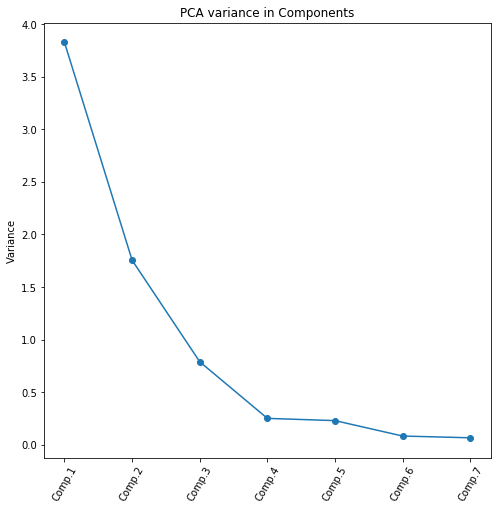

In [33]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()

screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png') 


# comp 2 to comp 3 or 3 to 4 has the most slope change - comp 4 starts the flat line
# first two or three at best first 4 can be retained
# Will retain until 3 components

In [34]:
#summary.sdev**2
#pca.components_[0]
#np.sum(pca.components_[0]**2)

In [35]:
####----
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function with some adjustments
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [36]:
####----
calcpc(standardisedX, pca.components_[0])
pca.transform(standardisedX)[:, 0]
pca.transform(standardisedX)[:, 0]
pca.components_[1]
np.sum(pca.components_[1]**2)
#highest loadings for

0.9999999999999991

In [37]:
# Define high and low mortality
# The code below is not used.
# y as defined earlier will rather be used

#import sklearn 
#from sklearn import preprocessing
#standardisedX_mortality = sklearn.preprocessing.scale(df_diff_ratio_mortality)
#standardisedX_mortality = pd.DataFrame(standardisedX_mortality, index=df_diff_ratio_mortality.index, columns=df_diff_ratio_mortality.columns)
#standardisedX_mortality.apply(np.mean), '---', standardisedX_mortality.apply(np.std)
#standardisedX_mortality

vegetables_ratio  protein_ratio  grain_ratio  dairy_ratio  fruits_ratio  \
0          -0.121552      -2.109042    -0.800008     3.453810      3.122083   
1          -1.326283      -1.346979     1.892344     1.225812      1.904395   
2          -1.568118      -1.044254     0.935506     0.954747     -0.082367   
3          -2.180764      -0.912839     0.061121     0.583038      0.080454   
4          -1.288239       0.324758     0.096416    -0.408665     -0.062015   
5          -0.405719       0.831884     0.602383    -0.298889      0.237848   
6          -0.229330       0.994795     0.668884    -0.284044     -0.457875   
7          -0.175870       1.060652     1.329258    -0.157867     -0.332366   
8           0.284973       0.455767     1.023137    -0.752841      0.412203   
9           0.182341       0.761983     0.388056    -0.531611     -0.103398   
10          0.693785       0.694373    -0.075438    -0.617445     -0.959229   
11          0.417961       1.329847    -0.046270    -0.554476      0.153724   
12          1.183656       0.686187    -0.082274    -0.650366     -0.381213   
13          0.980460       0.641013    -0.525487    -0.605833     -0.301498   
14          0.849921       0.168652    -0.878690    -0.568961     -1.136976   
15          1.281560      -0.168489    -0.732623    -0.458586     -0.431755   
16          1.256622      -0.939486    -1.726832    -0.304156     -0.905973   
17          0.164595      -1.428825    -2.129484    -0.023668     -0.756041   

    sugars_ratio  oils_ratio  
0      -0.401950   -2.371936  
1      -2.296736   -1.440587  
2      -1.720544    0.183590  
3      -1.720544   -0.752913  
4      -0.429873    0.075928  
5       0.296129    1.352470  
6       0.296129    0.320996  
7       0.296129   -0.469659  
8       0.296129    1.365391  
9       1.592562    0.403144  
10      0.296129    0.328340  
11      0.296129    1.108678  
12      0.296129    1.198164  
13      1.719663    0.975608  
14      0.296129   -0.582286  
15      0.296129   -0.111209  
16      0.296129   -0.489554  
17      0.296129   -1.094166

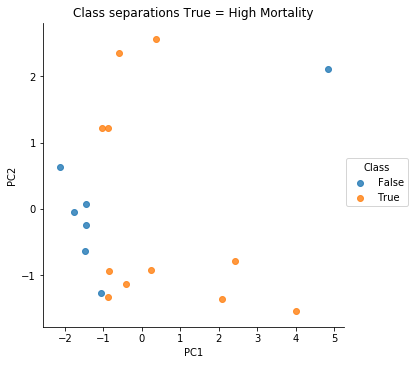

In [39]:
####----
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Class separations True = High Mortality')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
standardisedX

# Plot first two components

Next section (i.e. four components) is more important than this

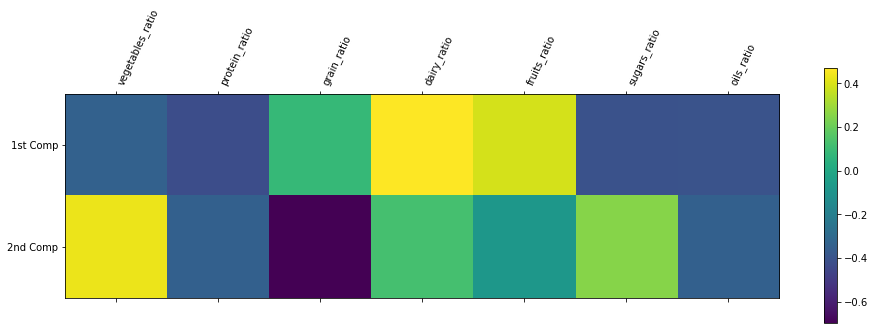

In [40]:
####----
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21


pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show() # 
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

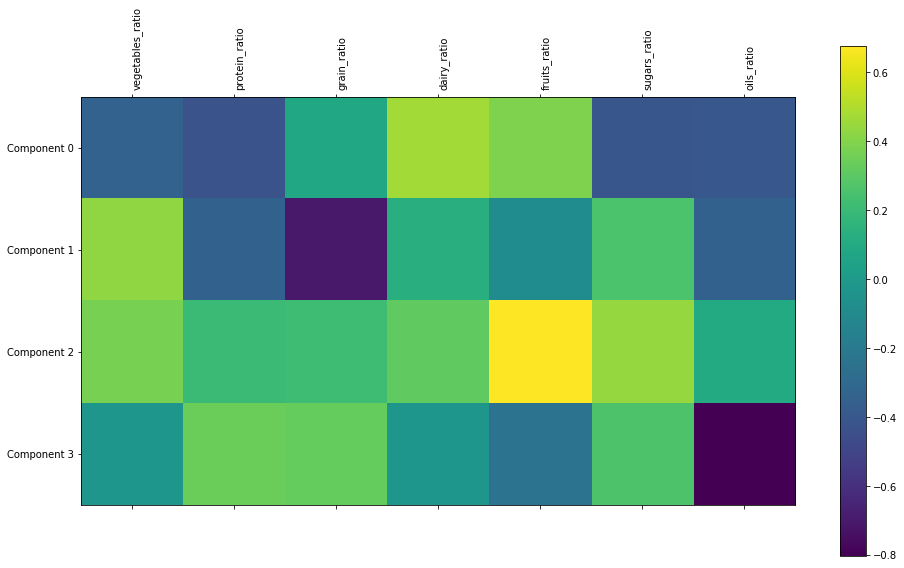

In [41]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 4

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX.columns)), standardisedX.columns, rotation=90, ha='left')
plt.show()# 

First three components explain the data by 91%

Contributors for First Component: Sugar, Oil, Protein and then Vegetables negatively (-0.6 approx). 
Dairy somewhat (0.5) positively, and Fruits (.3) minimally positively

Contributors for 2nd Component: grain strongly and negatively. Oil and protein minimally and negatively. 
Vegetables strongly and positively. Sugars minimally positively

Contributors for 3rd component: Fruit positively where sugars minimally positive.

---

Contributors for 4th component: Oil strongly and negatively 

---

Considering all Components: Grain and Oil contribute the most negatively then protein and sugar

Fruits contributes the most positively then vegetable and dairy.

--

Can do regression with all food groups


In [52]:
#df_diff_ratio_with_mortality = df_diff_ratio_only
#df_diff_ratio_with_mortality['mortality_rates'] = df_diff_ratio_mortality['ESRD patients: Avg. Annual Mortality rates']

In [31]:
#df_diff_ratio_with_mortality.corr()
standardisedX_with_target.corr()

vegetables_ratio  protein_ratio  \
vegetables_ratio                                    1.000000       0.319957   
protein_ratio                                       0.319957       1.000000   
grain_ratio                                        -0.516486       0.311575   
dairy_ratio                                        -0.437021      -0.763556   
fruits_ratio                                       -0.379819      -0.486806   
sugars_ratio                                        0.758409       0.587568   
oils_ratio                                          0.278404       0.801816   
ESRD patients: Avg. Annual Mortality rates          0.579190      -0.268544   

                                            grain_ratio  dairy_ratio  \
vegetables_ratio                              -0.516486    -0.437021   
protein_ratio                                  0.311575    -0.763556   
grain_ratio                                    1.000000     0.041399   
dairy_ratio                                    0.041399     1.000000   
fruits_ratio                                   0.308313     0.835731   
sugars_ratio                                  -0.370720    -0.552530   
oils_ratio                                     0.241348    -0.752612   
ESRD patients: Avg. Annual Mortality rates    -0.837880    -0.222247   

                                            fruits_ratio  sugars_ratio  \
vegetables_ratio                               -0.379819      0.758409   
protein_ratio                                  -0.486806      0.587568   
grain_ratio                                     0.308313     -0.370720   
dairy_ratio                                     0.835731     -0.552530   
fruits_ratio                                    1.000000     -0.423981   
sugars_ratio                                   -0.423981      1.000000   
oils_ratio                                     -0.460661      0.466418   
ESRD patients: Avg. Annual Mortality rates     -0.426335      0.348632   

                                            oils_ratio  \
vegetables_ratio                              0.278404   
protein_ratio                                 0.801816   
grain_ratio                                   0.241348   
dairy_ratio                                  -0.752612   
fruits_ratio                                 -0.460661   
sugars_ratio                                  0.466418   
oils_ratio                                    1.000000   
ESRD patients: Avg. Annual Mortality rates   -0.191639   

                                            ESRD patients: Avg. Annual Mortality rates  
vegetables_ratio                                                              0.579190  
protein_ratio                                                                -0.268544  
grain_ratio                                                                  -0.837880  
dairy_ratio                                                                  -0.222247  
fruits_ratio                                                                 -0.426335  
sugars_ratio                                                                  0.348632  
oils_ratio                                                                   -0.191639  
ESRD patients: Avg. Annual Mortality rates                                    1.000000

In [32]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.set_option('display.height', 1000)

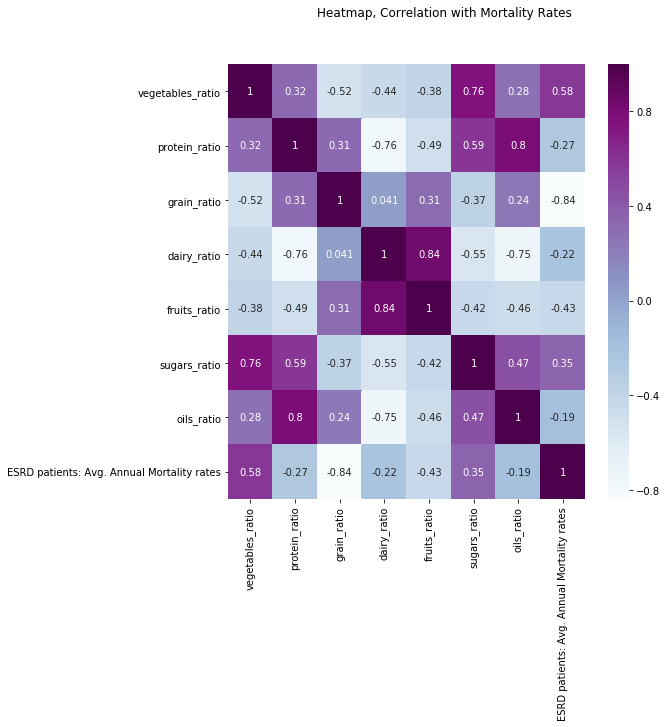

In [44]:
plt.figure(figsize=(8, 8))

corr = standardisedX_with_target.corr() #df_diff_ratio_with_mortality.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu");
plt.suptitle('Heatmap, Correlation with Mortality Rates');
plt.savefig('heatmap-ckd-mortality-regression-after-pca.png')

# just with actual intake data - this can be biased by ages -- still for a comparison

In [34]:
df_esrdonly_mortality_only.columns

Index(['ESRD patients: Avg. Annual Mortality rates'], dtype='object')

In [37]:
# PCA
# Applying PCA on Difference data

####----
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

import sklearn 
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_esrdonly_actual_only)
standardisedX = pd.DataFrame(standardisedX, index=df_esrdonly_actual_only.index, columns=df_esrdonly_actual_only.columns)
standardisedX.apply(np.mean)

Actual Vegetable Intake                      -3.407768e-16
Actual Protein Intake                         7.771561e-16
Actual Grain Intake                          -4.440892e-16
Actual Dairy Intake                           9.637353e-17
Actual Fruit intakes                         -3.380012e-15
Actual Added Sugars Taken                    -1.634495e-16
Avg Fats oils and salad dressings taken       8.018277e-16
ESRD patients: Avg. Annual Mortality rates    1.480297e-16
dtype: float64

In [38]:
standardisedX_with_target = standardisedX
standardisedX_with_target

Actual Vegetable Intake  Actual Protein Intake  Actual Grain Intake  Actual Dairy Intake  Actual Fruit intakes  Actual Added Sugars Taken  Avg Fats oils and salad dressings taken  ESRD patients: Avg. Annual Mortality rates
0                 -2.280529              -2.792232            -2.695129             3.095918             -0.910766                  -2.646045                                -2.918977                                   -0.453299
1                 -1.741706              -1.625980            -0.289299             1.462787             -0.063027                  -2.144689                                -1.698412                                   -0.807878
2                 -1.427355              -0.851563             0.488110             1.270495             -1.633513                  -1.141977                                -0.257085                                   -0.850857
3                 -1.344091              -0.383297             0.593780             0.806936              1.062635                  -0.139266                                 0.377608                                   -0.844717
4                 -0.631896               0.529339             0.623660            -0.429819              0.753832                   0.863446                                 0.640826                                   -0.754154
5                  0.072314               0.903306             1.051990            -0.292916              1.403790                   0.863446                                 1.364674                                   -0.698383
6                  0.213065               1.023441             1.108287            -0.274403             -0.104201                   0.863446                                 0.693894                                   -0.611401
7                  0.255724               0.877471             1.314163            -0.117047              0.167840                   0.863446                                 0.020991                                   -0.535165
8                  0.623456               0.399300             0.981118            -0.859040              1.781706                   0.863446                                 1.126929                                   -0.478882
9                  0.541560               0.616748             0.473352            -0.583144              0.664132                   0.863446                                 0.526199                                   -0.440508
10                 0.949669               0.568738             0.102776            -0.690188             -1.190895                   0.362090                                 0.479499                                   -0.290593
11                 0.410162               1.019996             0.126096            -0.611659              1.221448                   0.362090                                 0.583512                                   -0.130956
12                 0.897657               0.562925             0.097310            -0.731244              0.061965                   0.362090                                 0.538935                                    0.087522
13                 0.747097               0.530846            -0.257051            -0.675706              0.234748                   0.362090                                 0.411572                                    0.329024
14                 0.650374               0.195416            -0.539447            -0.629724             -1.576164                  -0.139266                                -0.479971                                    0.681044
15                 0.970200              -0.043992            -0.422663            -0.492074             -0.047587                  -0.139266                                -0.210385                                    1.163536
16                 0.951722              -0.591487            -1.217561            -0.299485             -1.075461                  -0.139266    

In [39]:
standardisedX = standardisedX.drop(['ESRD patients: Avg. Annual Mortality rates'], axis=1)

####----

standardisedX.apply(np.std)

####---

from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

####---

#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

####----

summary = pca_summary(pca, standardisedX)

Importance of components:


sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           2.250700               0.723665              0.723665
PC2           1.097773               0.172158              0.895822
PC3           0.686616               0.067349              0.963171
PC4           0.312267               0.013930              0.977101
PC5           0.280053               0.011204              0.988305
PC6           0.214747               0.006588              0.994894
PC7           0.189064               0.005106              1.000000

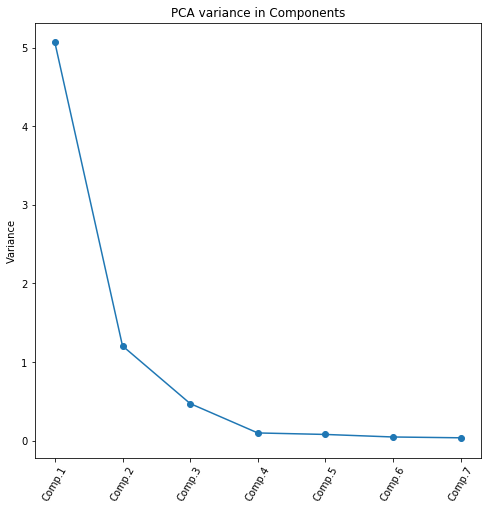

In [40]:
####----

# First two component can define over 95% 
np.sum(summary.sdev**2)

# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
plt.rcParams['figure.figsize'] = 8, 8   

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()



screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            



In [41]:

####---

# comp 2 to comp 3 is the most change - slope
# first two or at best first 3 can be retained

summary.sdev**2

#Can be retained
#PC1 4.263124 PC2 1.449435

pca.components_[0]
np.sum(pca.components_[0]**2)

####----

# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

####----

calcpc(standardisedX, pca.components_[0])
pca.transform(standardisedX)[:, 0]
pca.transform(standardisedX)[:, 0]
pca.components_[1]
np.sum(pca.components_[1]**2)

1.0000000000000007

In [43]:

#highest loadings for

####----

# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work

#df_esrdonly_mortality_only['ESRD patients: Avg. Annual Mortality rates']
#sorted(standardisedX['ESRD patients: Avg. Annual Mortality rates'])

# Define high and low mortality


#y = df_esrdonly_mortality[' ESRD patients: Avg. Annual Mortality rates'] #< 0.5
# from normalized data. > 0.5 = high mortality
#print('as the older age show higher mortality, does it mean th')
#y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
#y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
#y


#import sklearn 
#from sklearn import preprocessing
#standardisedX_mortality = sklearn.preprocessing.scale(df_esrdonly_mortality_only)
#standardisedX_mortality = pd.DataFrame(standardisedX_mortality, index=df_esrdonly_mortality_only.index,  columns=df_esrdonly_mortality_only.columns)
#standardisedX_mortality.apply(np.mean), '---', standardisedX_mortality.apply(np.std)
#standardisedX_mortality

y = standardisedX_with_target['ESRD patients: Avg. Annual Mortality rates']  > 0.5 
y

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
Name: ESRD patients: Avg. Annual Mortality rates, dtype: bool

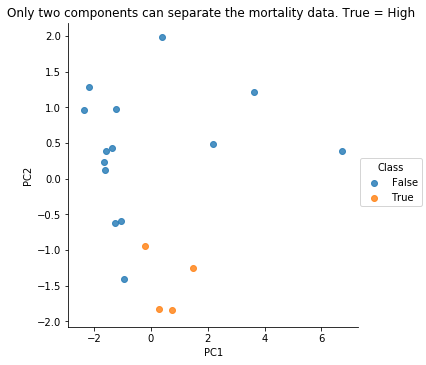

In [44]:
####----

# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_esrdonly[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2
pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Only two components can separate the mortality data. True = High ')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            



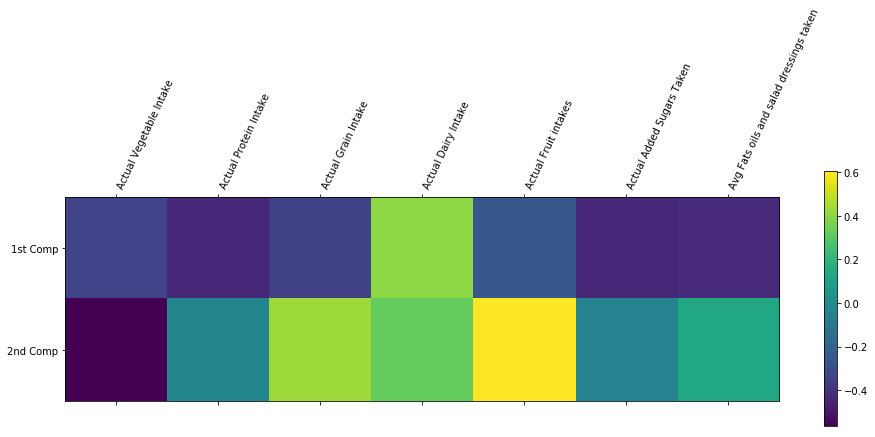

In [49]:

####----

# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show() # 
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

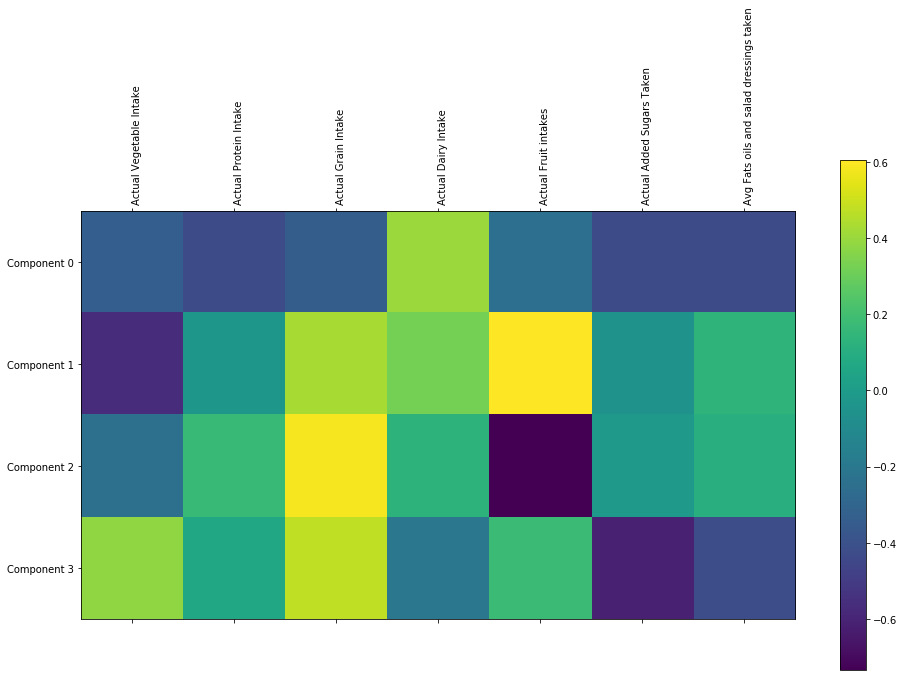

In [48]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 4

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX.columns)), standardisedX.columns, rotation=90, ha='left')
plt.show()# 






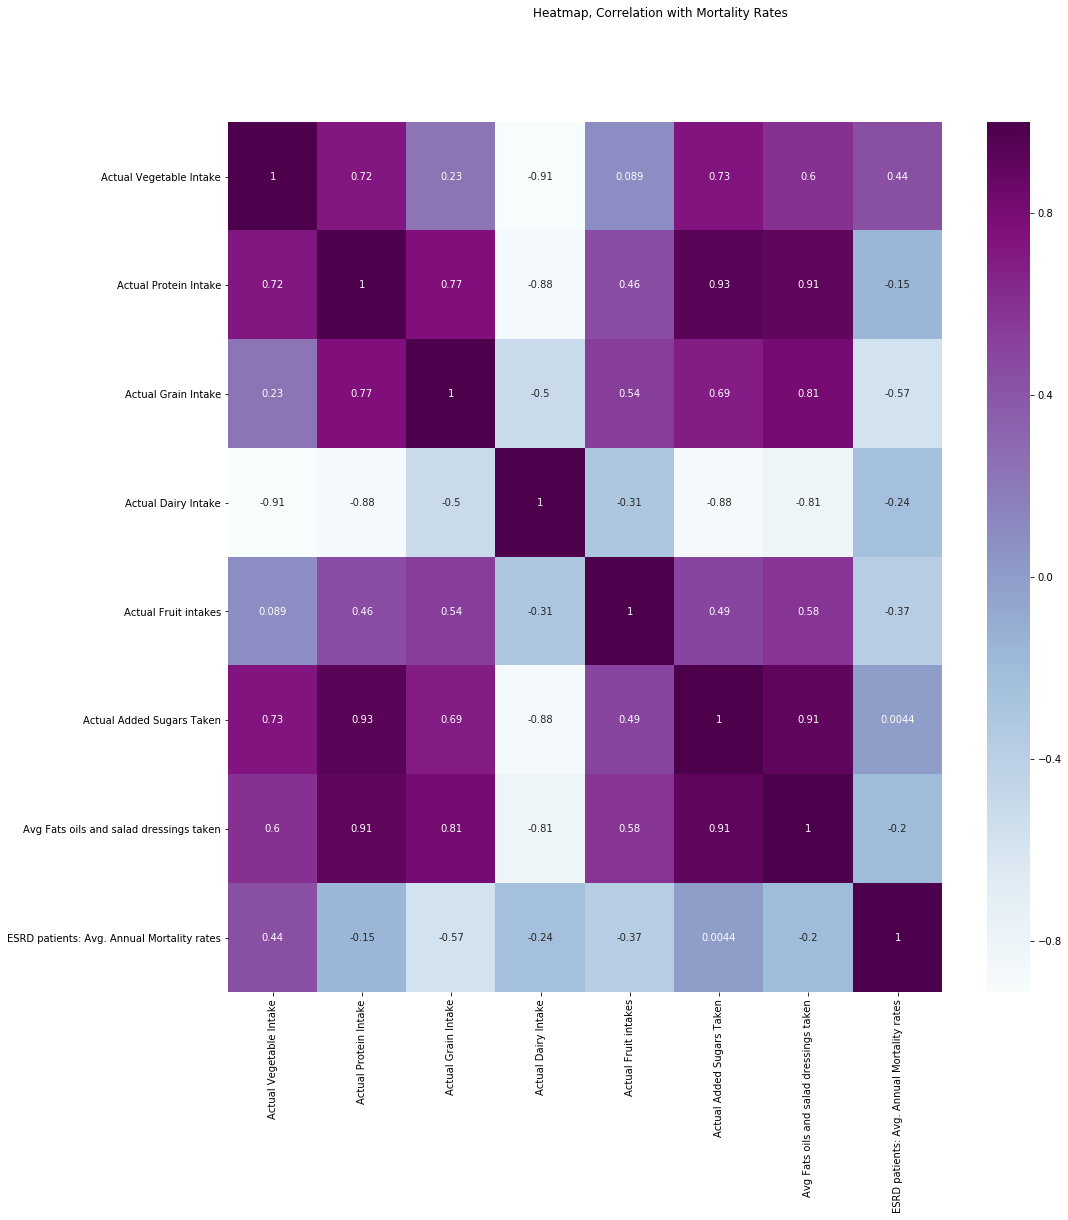

In [47]:
plt.figure(figsize=(16, 16))

corr = standardisedX_with_target.corr() #df_esrdonly_actual_only.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu");
plt.suptitle('Heatmap, Correlation with Mortality Rates');

# Univariate and Bivariate sections are kept for historical reasons. The input data file is changed; 
hence, univariate and bivariate sections might not give desired output 

# UNIVARIATE

Check and plot each column. Can show differences between intake and recommended amounts

Data are not missing here. These are processed data. Data adjustments were made for age or age group missing as well as adjusted for food groups. 

Fats and Sugars do not have recommended amounts in the data. Subject to be updated in future work

Bar Plot and Box Plots can show the relation clearly. Used other plots such as line, area, hist

In [35]:
matplotlib.style.use('ggplot')
plt.figure(figsize=(16, 5));

"""
plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['figure.figsize'] = 14, 14
df[' Actual Vegetable Intake'].plot.bar();
#plt.setxlabels(df['age_to'])
plt.suptitle('Vegetable Intake')
plt.xticks(range(len(df['age_to'])), df['age_from']);
plt.xlabel('Age group: From\n Colors do not mean anything')
plt.ylabel('Intake amount in gms')
"""
# might change color palette
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


"\nplt.rcParams['image.cmap'] = 'jet'\n#plt.rcParams['figure.figsize'] = 14, 14\ndf[' Actual Vegetable Intake'].plot.bar();\n#plt.setxlabels(df['age_to'])\nplt.suptitle('Vegetable Intake')\nplt.xticks(range(len(df['age_to'])), df['age_from']);\nplt.xlabel('Age group: From\n Colors do not mean anything')\nplt.ylabel('Intake amount in gms')\n"

<Figure size 1152x360 with 0 Axes>

TypeError: Empty 'DataFrame': no numeric data to plot

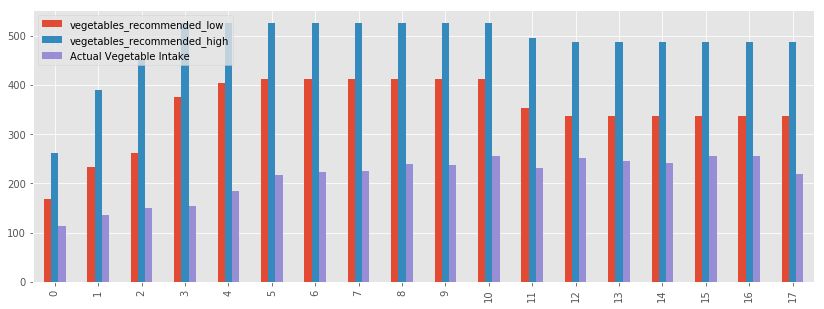

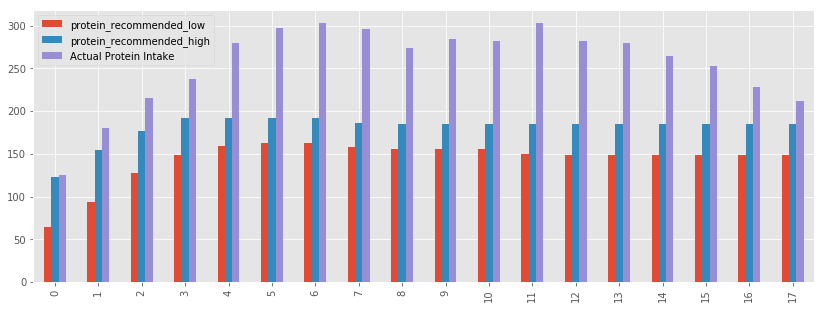

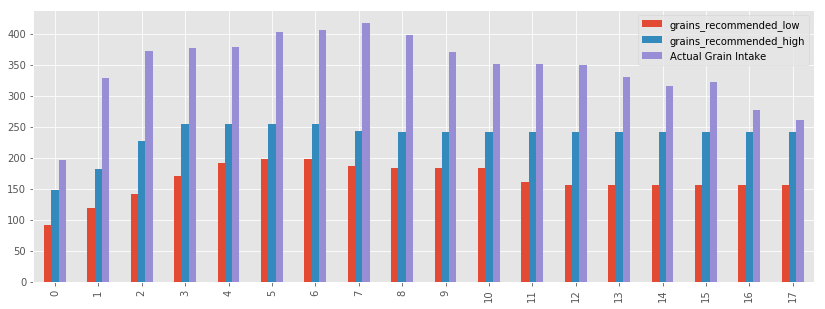

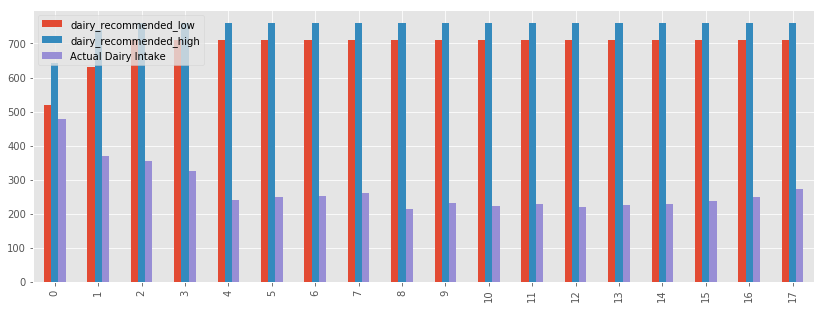

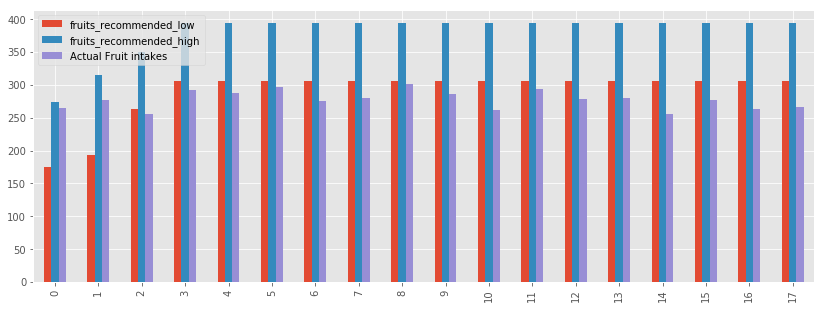

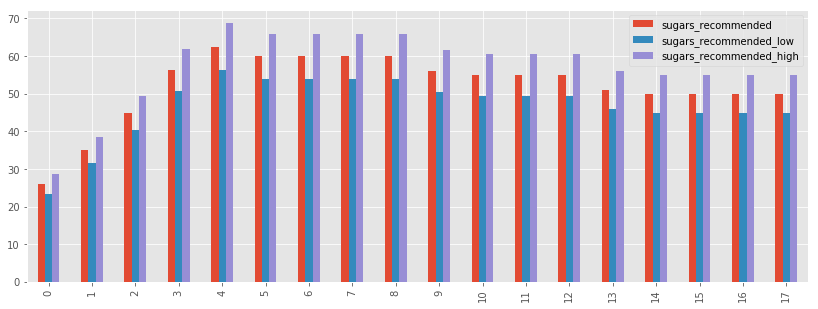

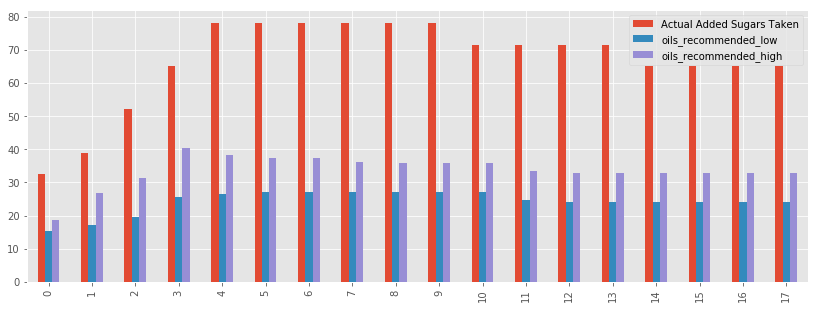

In [36]:
# plt.figure(figsize=(16, 5));
plt.rcParams['figure.figsize'] = 14, 5
df1 = df.iloc[:,3:6]

# df1['ESRD patients: Total (or %) deaths for target year'] = df[' ESRD patients: Total (or %) deaths for target year']
# df1['ESRD patients: Avg. Annual Mortality rates'] = df[' ESRD patients: Avg. Annual Mortality rates']
        
df2 = df.iloc[:,6:9]
df3 = df.iloc[:,9:12]
df4 = df.iloc[:,12:15]
df5 = df.iloc[:,15:18]
df6 = df.iloc[:,18:21]
df7 = df.iloc[:,21:24]
df8 = df.iloc[:,30:32]
df9 = df.iloc[:,32:34]


df1.plot.bar();
df2.plot.bar();
df3.plot.bar();
df4.plot.bar();
df5.plot.bar();
df6.plot.bar();
df7.plot.bar();
df8.plot.bar();
df9.plot.bar();

# plt.xlabel('Age Groups (from)')
# plt.ylabel('Amount in Gms')

plt.xticks(range(len(df['age_to'])), df['age_from']);
plt.xlabel('Age group: From\n Colors do not mean anything, just the different column')
plt.ylabel('Intake amount in gms')

In [ ]:
df1.plot.line();
df2.plot.line();
df3.plot.line();
df4.plot.line();
df5.plot.line();
df6.plot.line();
df7.plot.line();
df8.plot.line();
df9.plot.line();

# plt.xlabel('Age Groups (from)')
# plt.ylabel('Amount in Gms')

plt.xticks(range(len(df['age_to'])), df['age_from']);
plt.xlabel('Age group: From')
plt.ylabel('Intake amount in gms')

Text(0,0.5,'Intake amount in gms')

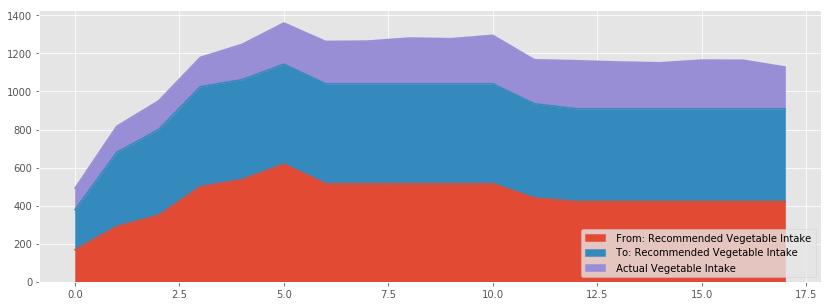

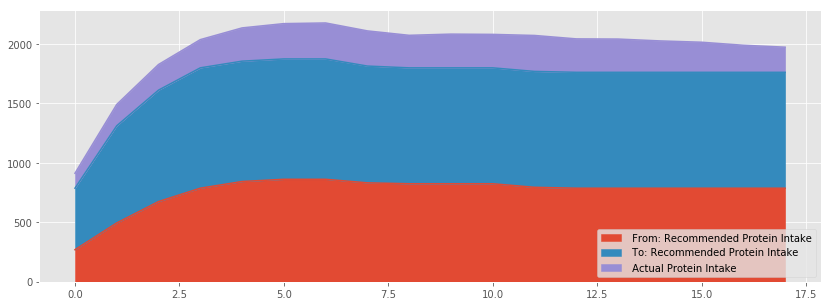

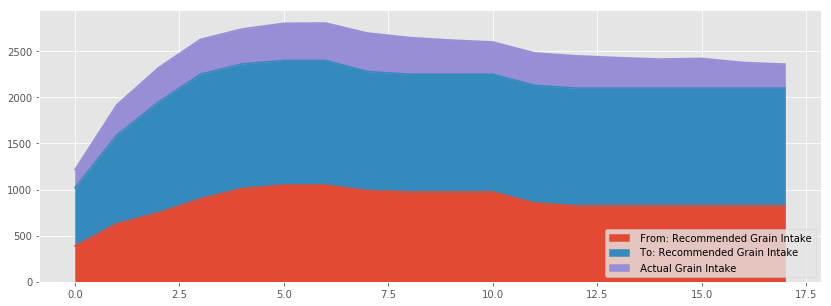

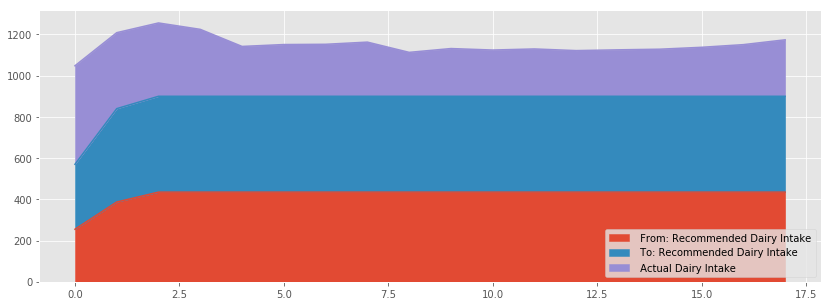

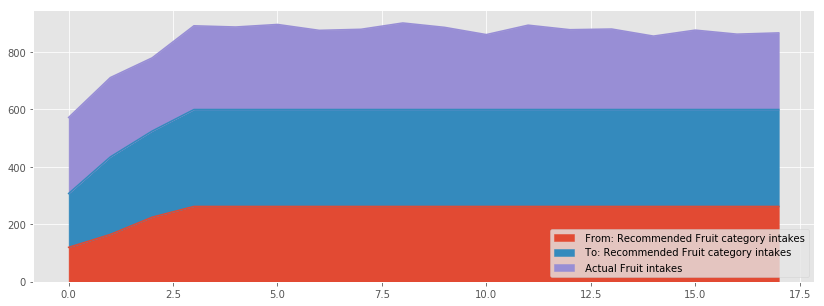

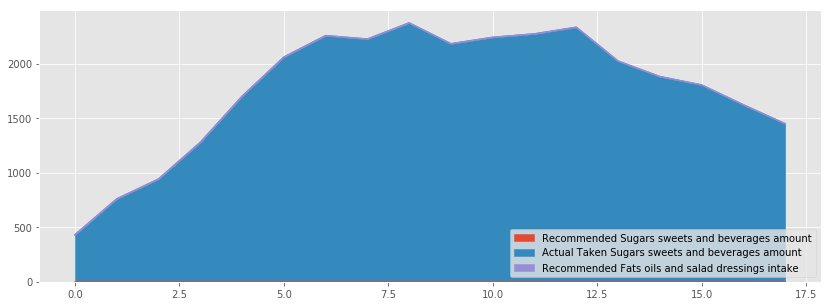

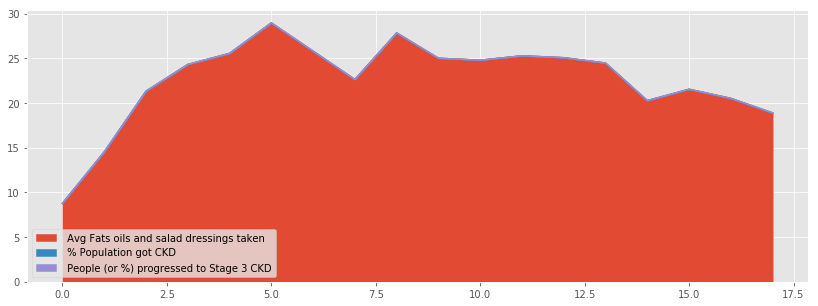

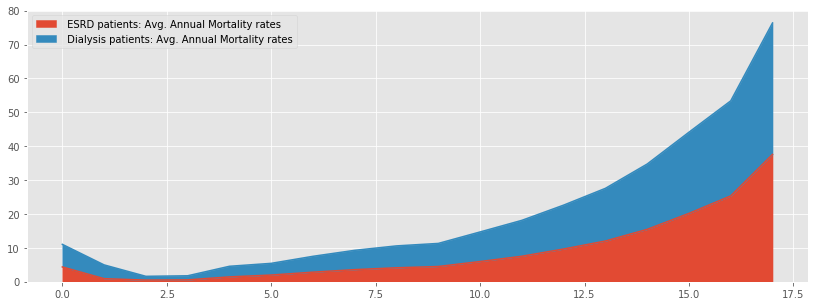

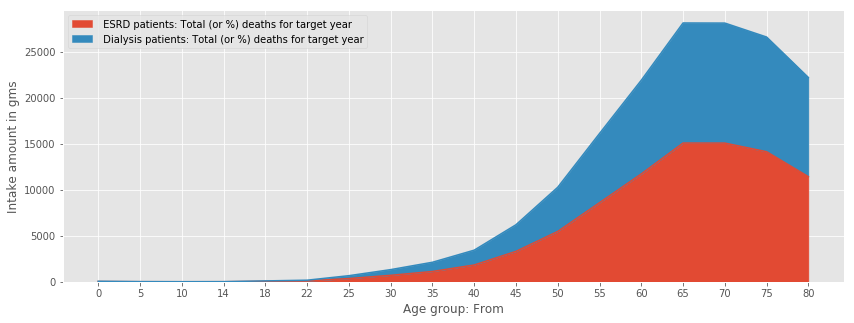

In [10]:
df1.plot.area();
df2.plot.area();
df3.plot.area();
df4.plot.area();
df5.plot.area();
df6.plot.area();
df7.plot.area();
df8.plot.area();
df9.plot.area();


plt.xticks(range(len(df['age_to'])), df['age_from']);
plt.xlabel('Age group: From')
plt.ylabel('Intake amount in gms')

Text(0.5,0,'Intake/Recommended data distribution')

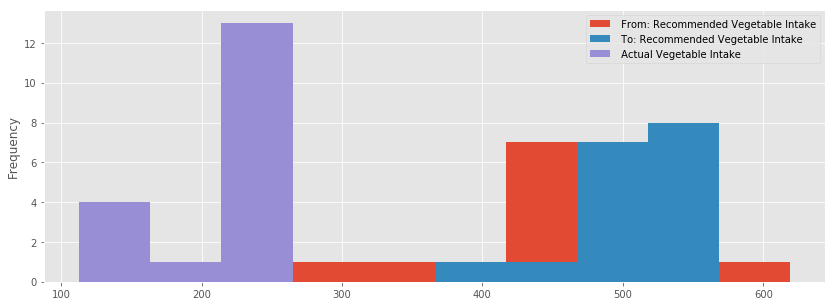

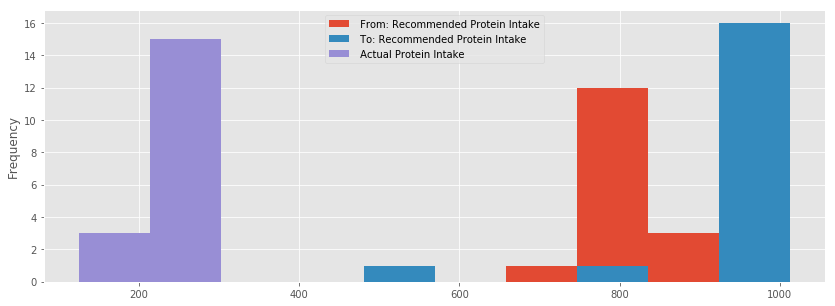

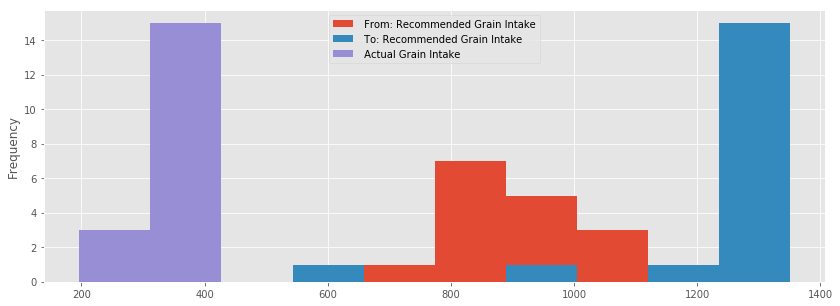

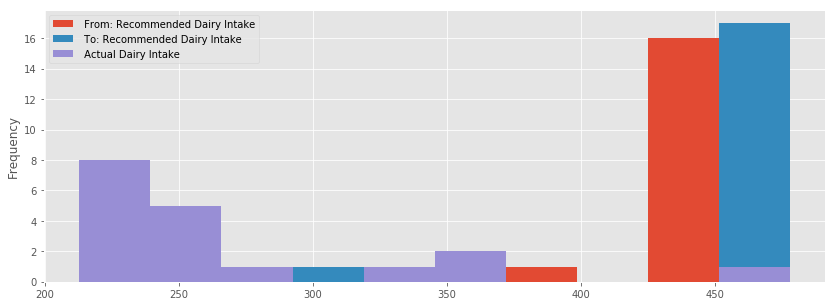

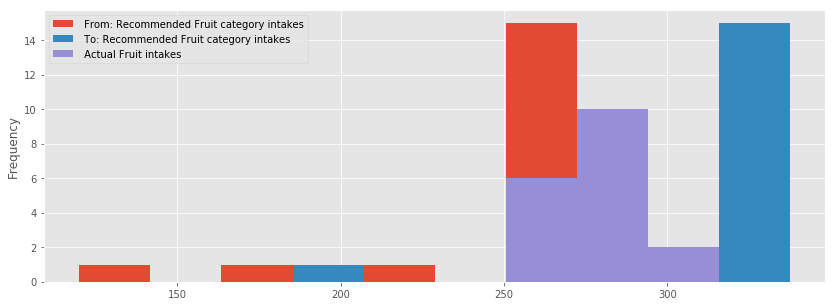

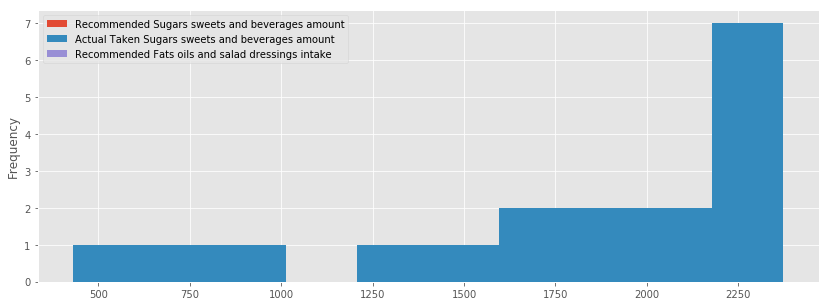

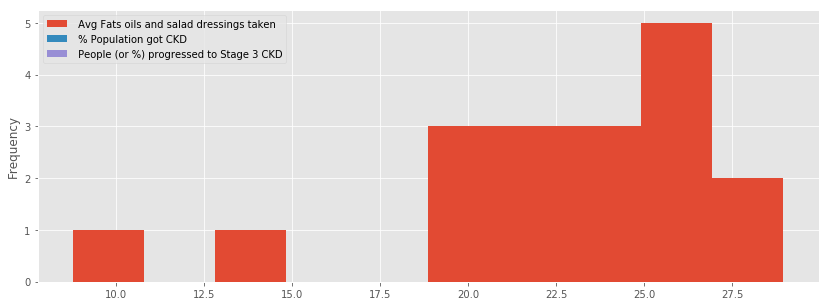

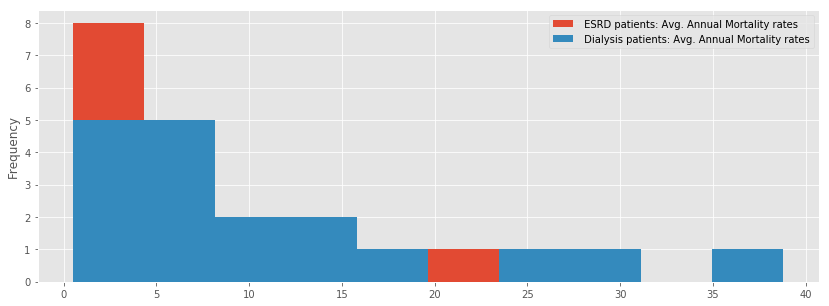

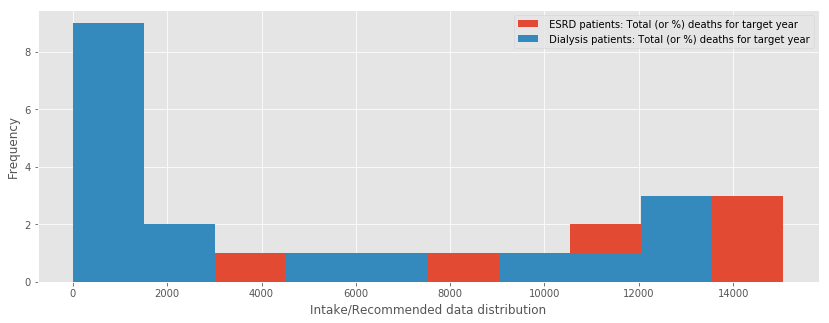

In [11]:
df1.plot.hist();
df2.plot.hist();
df3.plot.hist();
df4.plot.hist();
df5.plot.hist();
df6.plot.hist();
df7.plot.hist();
df8.plot.hist();
df9.plot.hist();

#plt.xlabel('Age Groups (from)')
#plt.ylabel('Amount in Gms')
#plt.xticks(range(len(df['age_to'])), df['age_from']);
plt.xlabel('Intake/Recommended data distribution')

Text(0,0.5,'Amount in Gms')

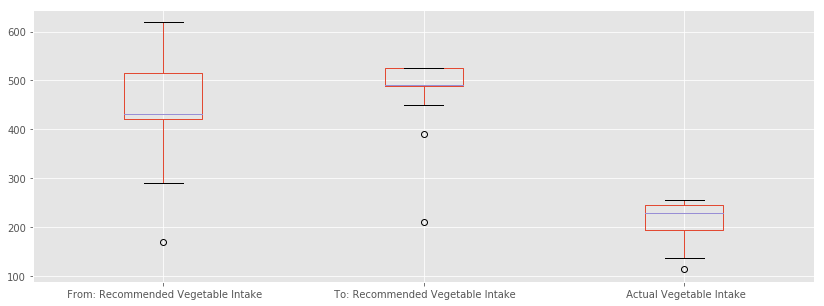

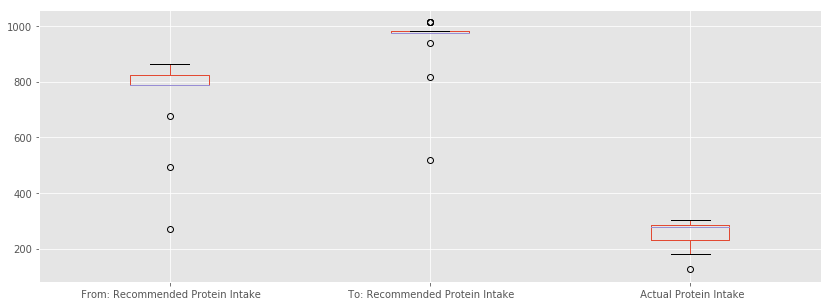

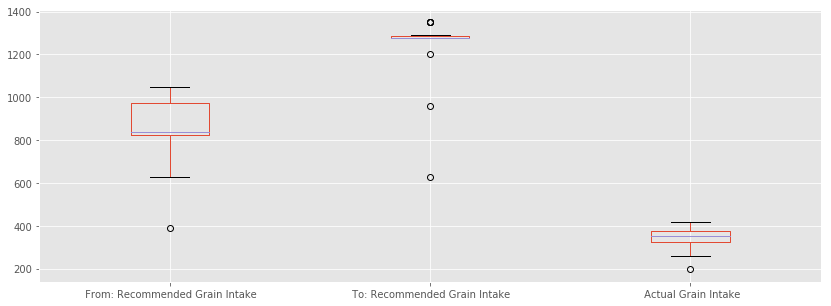

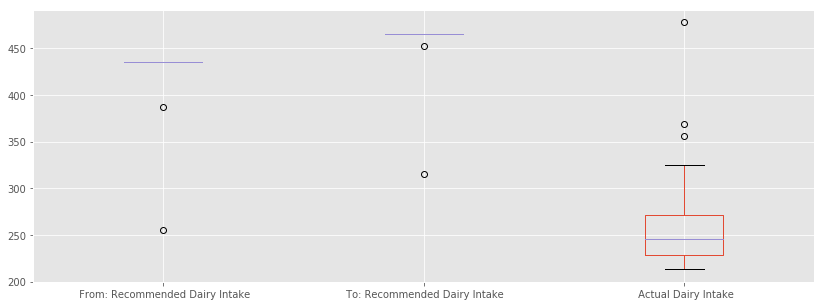

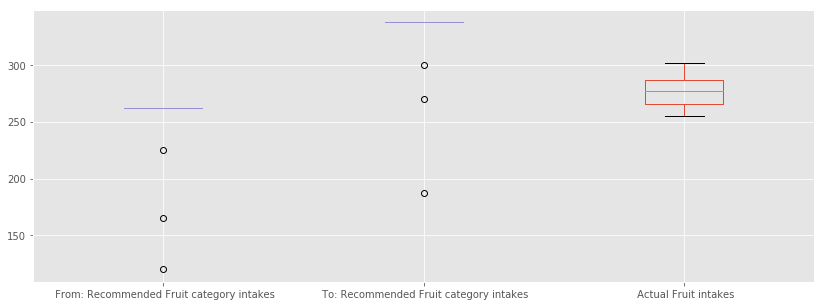

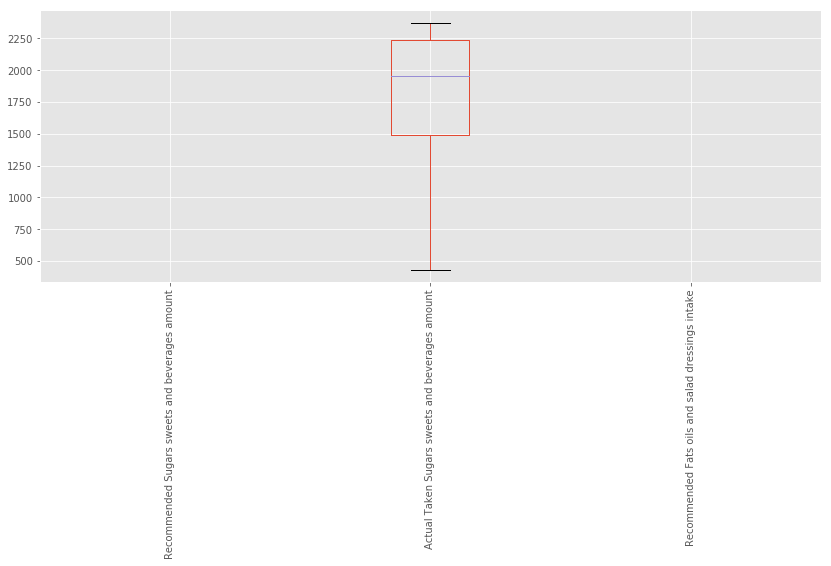

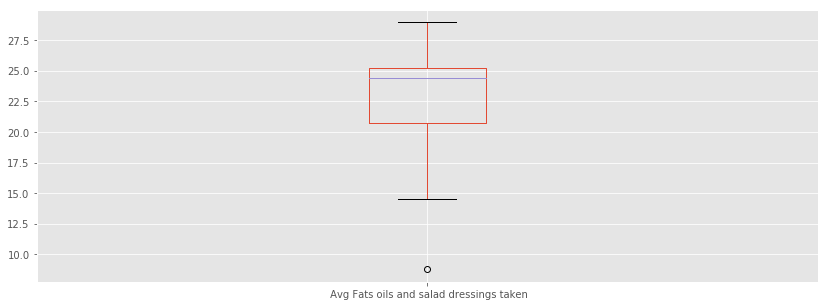

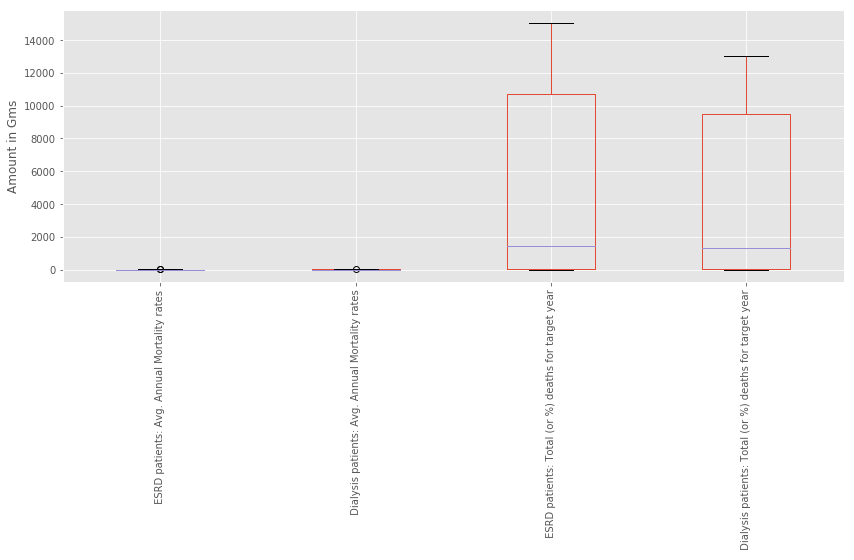

In [12]:
df1.plot.box();
df2.plot.box();
df3.plot.box();
df4.plot.box();
df5.plot.box();
df6.plot.box();
plt.xticks(range(1, len(df6.columns)+1),df6.columns,rotation=90)

df77 = df.iloc[:,21:22]
df88 = df.iloc[:,30:34]
df99 = df.iloc[:,34:36]

df77.plot.box();


df88.plot.box();
#df99.plot.box();
plt.xticks(range(1, len(df88.columns)+1),df88.columns,rotation=90)

#plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')

#plt.xticks(range(len(df['age_to'])), df['age_from']);

In [13]:
df.corr()

age_from    age_to  \
age_from                                            1.000000  0.999792   
age_to                                              0.999792  1.000000   
 From: Recommended Vegetable Intake                 0.162505  0.151799   
 To: Recommended Vegetable Intake                   0.376040  0.367846   
 Actual Vegetable Intake                            0.812112  0.811140   
 From: Recommended Protein Intake                   0.471687  0.462945   
 To: Recommended Protein Intake                     0.431892  0.422425   
 Actual Protein Intake                              0.291400  0.285915   
 From: Recommended Grain Intake                     0.179856  0.171462   
 To: Recommended Grain Intake                       0.432621  0.422491   
 Actual Grain Intake                               -0.255409 -0.261402   
 From: Recommended Dairy Intake                     0.468299  0.460080   
 To: Recommended Dairy Intake                       0.415121  0.407889   
 Actual Dairy Intake                               -0.646477 -0.642236   
 From: Recommended Fruit category intakes           0.585700  0.577368   
 To: Recommended Fruit category intakes             0.565319  0.557481   
 Actual Fruit intakes                              -0.199925 -0.204636   
Recommended Sugars sweets and beverages amount           NaN       NaN   
Actual Taken Sugars sweets and beverages amount     0.461752  0.460212   
Recommended Fats oils and salad dressings intake         NaN       NaN   
 Avg Fats oils and salad dressings taken            0.181850  0.172085   
 % Population got CKD                                    NaN       NaN   
 People (or %) progressed to Stage 3 CKD                 NaN       NaN   
 People (or %) progressed to Stage 4 CKD                 NaN       NaN   
 People (or %) progressed to ESRD                        NaN       NaN   
 Received dietitian care (Optional)                      NaN       NaN   
 Did not Receive dietitian care (Optional)               NaN       NaN   
 Patients went for dialysis                              NaN       NaN   
 Patients went for Kidney Transplantation                NaN       NaN   
 ESRD patients: Avg. Annual Mortality rates         0.854841  0.854759   
 Dialysis patients: Avg. Annual Mortality rates     0.878659  0.879439   
 ESRD patients: Total (or %) deaths for target ...  0.907545  0.907790   
 Dialysis patients: Total (or %) deaths for tar...  0.914524  0.914723   

                                                     From: Recommended Vegetable Intake  \
age_from                                                                       0.162505   
age_to                                                                         0.151799   
 From: Recommended Vegetable Intake                                            1.000000   
 To: Recommended Vegetable Intake                                              0.907174   
 Actual Vegetable Intake                                                       0.553880   
 From: Recommended Protein Intake                                              0.907603   
 To: Recommended Protein Intake                                                0.840234   
 Actual Protein Intake                                                         0.855686   
 From: Recommended Grain Intake                                                0.978929   
 To: Recommended Grain Intake                                                  0.871426   
 Actual Grain Intake                                                           0.772009   
 From: Recommended Dairy Intake                                                0.757818   
 To: Recommended Dairy Intake                                                  0.703583   
 Actual Dairy Intake                                                          -0.757083   
 From: Recommended Fruit category intakes                                      0.835922   
 To: Recommended Fruit category intakes                                        

In [14]:
import numpy as np
import pandas as pd 
from subprocess import check_output

from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline


In [15]:
df = pd.read_csv('mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
df = df.drop( ['Recommended Sugars sweets and beverages amount', ' % Population got CKD', ' People (or %) progressed to Stage 3 CKD', ' People (or %) progressed to Stage 4 CKD', ' People (or %) progressed to ESRD', ' Received dietitian care (Optional)', ' Did not Receive dietitian care (Optional)', ' Patients went for dialysis', ' Patients went for Kidney Transplantation' ], axis=1)
df.head()

age_from  age_to   Gender   From: Recommended Vegetable Intake  \
0         0       4  Neutral                              168.750   
1         5       9  Neutral                              290.625   
2        10      13  Neutral                              350.000   
3        14      17  Neutral                              500.000   
4        18      21  Neutral                              537.500   

    To: Recommended Vegetable Intake   Actual Vegetable Intake  \
0                              210.0                    113.08   
1                              390.0                    136.70   
2                              450.0                    150.48   
3                              525.0                    154.13   
4                              525.0                    185.35   

    From: Recommended Protein Intake   To: Recommended Protein Intake  \
0                             270.00                            517.5   
1                             495.00                            817.5   
2                             675.00                            937.5   
3                             787.50                           1012.5   
4                             843.75                           1012.5   

    Actual Protein Intake   From: Recommended Grain Intake  \
0                  125.47                              390   
1                  179.64                              630   
2                  215.61                              750   
3                  237.36                              900   
4                  279.75                             1012   

                            ...                             \
0                           ...                              
1                           ...                              
2                           ...                              
3                           ...                              
4                           ...                              

    From: Recommended Fruit category intakes  \
0                                      120.0   
1                                      165.0   
2                                      225.0   
3                                      262.5   
4                                      262.5   

    To: Recommended Fruit category intakes   Actual Fruit intakes  \
0                                    187.5                 264.79   
1                                    270.0                 276.32   
2                                    300.0                 254.96   
3                                    337.5                 291.63   
4                                    337.5                 287.43   

   Actual Taken Sugars sweets and beverages amount  \
0                                           430.64   
1                                           759.43   
2                                           941.40   
3                                          1277.58   
4                                          1699.97   

   Recommended Fats oils and salad dressings intake  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

    Avg Fats oils and salad dressings taken  \
0                                      8.77   
1                                     14.52   
2                                     21.31   
3                                     24.30   
4                                     25.54   

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Avg. Annual Mortality rates  \
0       

In [16]:
df.corr()

age_from    age_to  \
age_from                                            1.000000  0.999792   
age_to                                              0.999792  1.000000   
 From: Recommended Vegetable Intake                 0.162505  0.151799   
 To: Recommended Vegetable Intake                   0.376040  0.367846   
 Actual Vegetable Intake                            0.812112  0.811140   
 From: Recommended Protein Intake                   0.471687  0.462945   
 To: Recommended Protein Intake                     0.431892  0.422425   
 Actual Protein Intake                              0.291400  0.285915   
 From: Recommended Grain Intake                     0.179856  0.171462   
 To: Recommended Grain Intake                       0.432621  0.422491   
 Actual Grain Intake                               -0.255409 -0.261402   
 From: Recommended Dairy Intake                     0.468299  0.460080   
 To: Recommended Dairy Intake                       0.415121  0.407889   
 Actual Dairy Intake                               -0.646477 -0.642236   
 From: Recommended Fruit category intakes           0.585700  0.577368   
 To: Recommended Fruit category intakes             0.565319  0.557481   
 Actual Fruit intakes                              -0.199925 -0.204636   
Actual Taken Sugars sweets and beverages amount     0.461752  0.460212   
Recommended Fats oils and salad dressings intake         NaN       NaN   
 Avg Fats oils and salad dressings taken            0.181850  0.172085   
 ESRD patients: Avg. Annual Mortality rates         0.854841  0.854759   
 Dialysis patients: Avg. Annual Mortality rates     0.878659  0.879439   
 ESRD patients: Total (or %) deaths for target ...  0.907545  0.907790   
 Dialysis patients: Total (or %) deaths for tar...  0.914524  0.914723   

                                                     From: Recommended Vegetable Intake  \
age_from                                                                       0.162505   
age_to                                                                         0.151799   
 From: Recommended Vegetable Intake                                            1.000000   
 To: Recommended Vegetable Intake                                              0.907174   
 Actual Vegetable Intake                                                       0.553880   
 From: Recommended Protein Intake                                              0.907603   
 To: Recommended Protein Intake                                                0.840234   
 Actual Protein Intake                                                         0.855686   
 From: Recommended Grain Intake                                                0.978929   
 To: Recommended Grain Intake                                                  0.871426   
 Actual Grain Intake                                                           0.772009   
 From: Recommended Dairy Intake                                                0.757818   
 To: Recommended Dairy Intake                                                  0.703583   
 Actual Dairy Intake                                                          -0.757083   
 From: Recommended Fruit category intakes                                      0.835922   
 To: Recommended Fruit category intakes                                        0.831906   
 Actual Fruit intakes                                                          0.528697   
Actual Taken Sugars sweets and beverages amount                                0.764331   
Recommended Fats oils and salad dressings intake                                    NaN   
 Avg Fats oils and salad dressings taken                                       0.908047   
 ESRD patients: Avg. Annual Mortality rates                                   -0.129287   
 Dialysis patients: Avg. Annual Mortality rates                               -0.146685   
 ESRD patients: Total (or %) deaths for target ...                            -0.123538   
 Dialysis patient

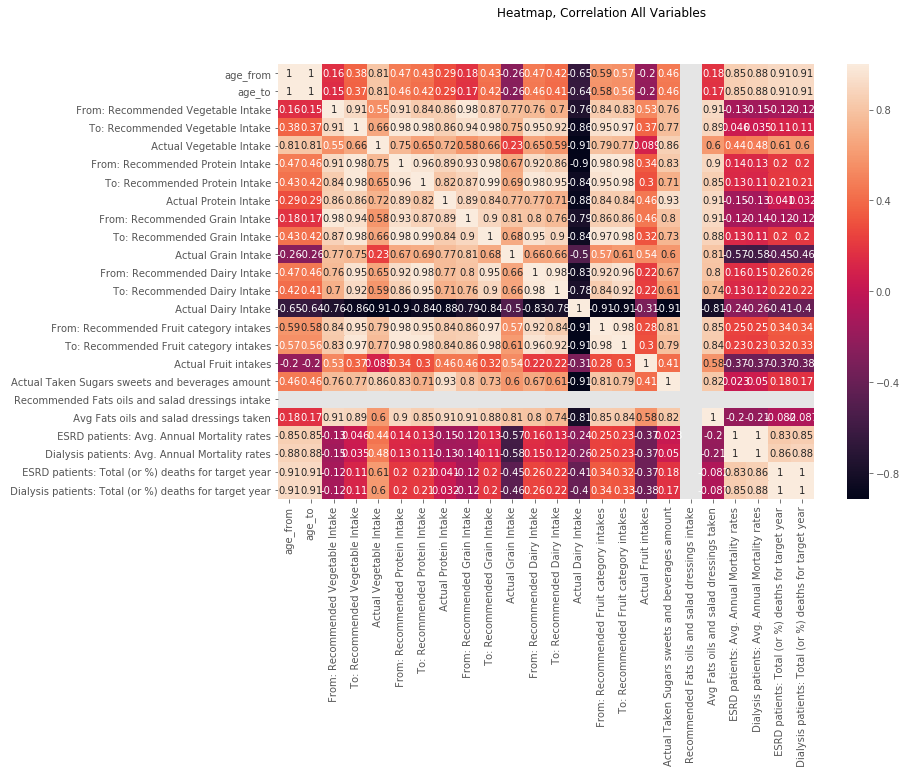

In [17]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation All Variables');

#  Will Check on Actual Taken Amount Only ####
# age_from and age_to can be removed

In [18]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
# df = df.drop([ 'age_from', 'age_to' ], axis=1)
df.head()

age_from  age_to   Gender   Actual Vegetable Intake  \
0         0       4  Neutral                    113.08   
1         5       9  Neutral                    136.70   
2        10      13  Neutral                    150.48   
3        14      17  Neutral                    154.13   
4        18      21  Neutral                    185.35   

    Actual Protein Intake   Actual Grain Intake   Actual Dairy Intake  \
0                  125.47                196.71                477.94   
1                  179.64                328.76                368.55   
2                  215.61                371.43                355.67   
3                  237.36                377.23                324.62   
4                  279.75                378.87                241.78   

    Actual Fruit intakes  Actual Taken Sugars sweets and beverages amount  \
0                 264.79                                           430.64   
1                 276.32                                           759.43   
2                 254.96                                           941.40   
3                 291.63                                          1277.58   
4                 287.43                                          1699.97   

    Avg Fats oils and salad dressings taken  \
0                                      8.77   
1                                     14.52   
2                                     21.31   
3                                     24.30   
4                                     25.54   

    ESRD patients: Total (or %) deaths for target year  \
0                                               32.0     
1                                               12.5     
2                                                8.0     
3                                               11.5     
4                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

In [19]:
df.describe()

age_from     age_to   Actual Vegetable Intake   Actual Protein Intake  \
count  18.000000  18.000000                 18.000000               18.000000   
mean   38.833333  42.555556                213.050000              255.163333   
std    25.011174  25.270821                 45.107202               47.794494   
min     0.000000   4.000000                113.080000              125.470000   
25%    19.000000  21.750000                193.067500              230.107500   
50%    37.500000  41.500000                227.645000              276.730000   
75%    58.750000  62.750000                244.740000              283.252500   
max    80.000000  84.000000                255.580000              302.700000   

        Actual Grain Intake   Actual Dairy Intake   Actual Fruit intakes  \
count             18.000000             18.000000              18.000000   
mean             344.638889            270.570000             277.177222   
std               56.478770             68.923649              13.995194   
min              196.710000            213.030000             254.960000   
25%              323.270000            228.692500             265.335000   
50%              350.920000            246.145000             277.275000   
75%              378.460000            271.137500             287.125000   
max              416.770000            477.940000             301.410000   

       Actual Taken Sugars sweets and beverages amount  \
count                                         18.00000   
mean                                        1768.37000   
std                                          584.28686   
min                                          430.64000   
25%                                         1492.15750   
50%                                         1952.06500   
75%                                         2236.91750   
max                                         2373.05000   

        Avg Fats oils and salad dressings taken  \
count                                 18.000000   
mean                                  22.521111   
std                                    4.847512   
min                                    8.770000   
25%                                   20.710000   
50%                                   24.380000   
75%                                   25.217500   
max                                   28.950000   

        ESRD patients: Total (or %) deaths for target year  \
count                                          18.000000     
mean                                         4941.333333     
std                                          5945.081086     
min                                             8.000000     
25%                                            66.500000     
50%                                          1472.500000     
75%                                         10706.875000     
max                                         15064.000000     

        ESRD patients: Avg. Annual Mortality rates  \
count                                    18.000000   
mean                                      8.819722   
std                                      10.055486   
min                                       0.505000   
25%                                       2.207500   
50%                                       4.452500   
75%                                      11.445000   
max                                      37.590000   

        Dialysis patients: Total (or %) deaths for target year  \
count                                          18.000000         
mean                                         4354.805556         
std                                          5230.340497         
min                                             3.500000         
25%                                            51.375000         
50%                                          1306.250000         
75%                                          9510.000000         
max                                 

In [20]:
#find correlation with price after standardization
df.corr()

age_from    age_to  \
age_from                                            1.000000  0.999792   
age_to                                              0.999792  1.000000   
 Actual Vegetable Intake                            0.812112  0.811140   
 Actual Protein Intake                              0.291400  0.285915   
 Actual Grain Intake                               -0.255409 -0.261402   
 Actual Dairy Intake                               -0.646477 -0.642236   
 Actual Fruit intakes                              -0.199925 -0.204636   
Actual Taken Sugars sweets and beverages amount     0.461752  0.460212   
 Avg Fats oils and salad dressings taken            0.181850  0.172085   
 ESRD patients: Total (or %) deaths for target ...  0.907545  0.907790   
 ESRD patients: Avg. Annual Mortality rates         0.854841  0.854759   
 Dialysis patients: Total (or %) deaths for tar...  0.914524  0.914723   
 Dialysis patients: Avg. Annual Mortality rates     0.878659  0.879439   

                                                     Actual Vegetable Intake  \
age_from                                                            0.812112   
age_to                                                              0.811140   
 Actual Vegetable Intake                                            1.000000   
 Actual Protein Intake                                              0.718591   
 Actual Grain Intake                                                0.232392   
 Actual Dairy Intake                                               -0.912659   
 Actual Fruit intakes                                               0.089207   
Actual Taken Sugars sweets and beverages amount                     0.861993   
 Avg Fats oils and salad dressings taken                            0.597893   
 ESRD patients: Total (or %) deaths for target ...                  0.606775   
 ESRD patients: Avg. Annual Mortality rates                         0.444925   
 Dialysis patients: Total (or %) deaths for tar...                  0.603179   
 Dialysis patients: Avg. Annual Mortality rates                     0.480531   

                                                     Actual Protein Intake  \
age_from                                                          0.291400   
age_to                                                            0.285915   
 Actual Vegetable Intake                                          0.718591   
 Actual Protein Intake                                            1.000000   
 Actual Grain Intake                                              0.766020   
 Actual Dairy Intake                                             -0.875043   
 Actual Fruit intakes                                             0.456722   
Actual Taken Sugars sweets and beverages amount                   0.932837   
 Avg Fats oils and salad dressings taken                          0.908040   
 ESRD patients: Total (or %) deaths for target ...                0.040950   
 ESRD patients: Avg. Annual Mortality rates                      -0.151035   
 Dialysis patients: Total (or %) deaths for tar...                0.031982   
 Dialysis patients: Avg. Annual Mortality rates                  -0.134234   

                                                     Actual Grain Intake  \
age_from                                                       -0.255409   
age_to                                                         -0.261402   
 Actual Vegetable Intake                                        0.232392   
 Actual Protein Intake                                          0.766020   
 Actual Grain Intake                                            1.000000   
 Actual Dairy Intake                                           -0.501747   
 Actual Fruit intakes                                           0.540745   
Actual Taken Sugars sweets and beverages amount                 0.595959   
 Avg Fats oils and salad dressings taken                        0.809486   
 ESRD patients: Total (or %) deaths for t

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052


ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000
    

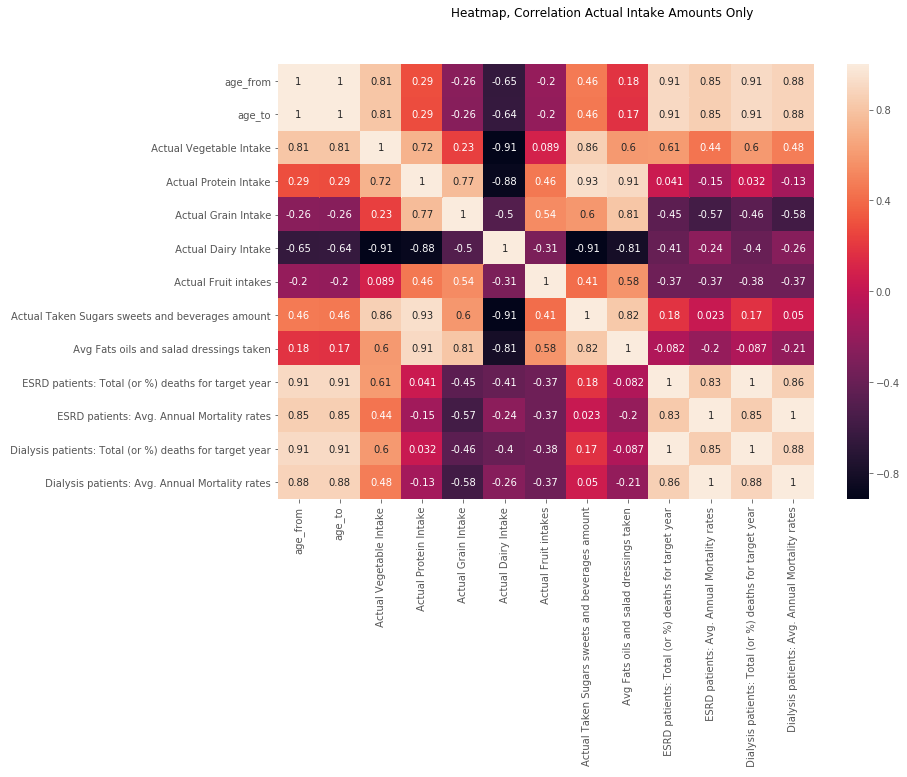

In [21]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');


In [22]:
# Without Age Groups

In [23]:
df_without_ages = df.drop(['age_from', 'age_to', ' Gender'], axis=1)
df_without_ages.head()

Actual Vegetable Intake   Actual Protein Intake   Actual Grain Intake  \
0                    113.08                  125.47                196.71   
1                    136.70                  179.64                328.76   
2                    150.48                  215.61                371.43   
3                    154.13                  237.36                377.23   
4                    185.35                  279.75                378.87   

    Actual Dairy Intake   Actual Fruit intakes  \
0                477.94                 264.79   
1                368.55                 276.32   
2                355.67                 254.96   
3                324.62                 291.63   
4                241.78                 287.43   

   Actual Taken Sugars sweets and beverages amount  \
0                                           430.64   
1                                           759.43   
2                                           941.40   
3                                          1277.58   
4                                          1699.97   

    Avg Fats oils and salad dressings taken  \
0                                      8.77   
1                                     14.52   
2                                     21.31   
3                                     24.30   
4                                     25.54   

    ESRD patients: Total (or %) deaths for target year  \
0                                               32.0     
1                                               12.5     
2                                                8.0     
3                                               11.5     
4                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

In [24]:
df_without_ages.corr()

Actual Vegetable Intake  \
 Actual Vegetable Intake                                            1.000000   
 Actual Protein Intake                                              0.718591   
 Actual Grain Intake                                                0.232392   
 Actual Dairy Intake                                               -0.912659   
 Actual Fruit intakes                                               0.089207   
Actual Taken Sugars sweets and beverages amount                     0.861993   
 Avg Fats oils and salad dressings taken                            0.597893   
 ESRD patients: Total (or %) deaths for target ...                  0.606775   
 ESRD patients: Avg. Annual Mortality rates                         0.444925   
 Dialysis patients: Total (or %) deaths for tar...                  0.603179   
 Dialysis patients: Avg. Annual Mortality rates                     0.480531   

                                                     Actual Protein Intake  \
 Actual Vegetable Intake                                          0.718591   
 Actual Protein Intake                                            1.000000   
 Actual Grain Intake                                              0.766020   
 Actual Dairy Intake                                             -0.875043   
 Actual Fruit intakes                                             0.456722   
Actual Taken Sugars sweets and beverages amount                   0.932837   
 Avg Fats oils and salad dressings taken                          0.908040   
 ESRD patients: Total (or %) deaths for target ...                0.040950   
 ESRD patients: Avg. Annual Mortality rates                      -0.151035   
 Dialysis patients: Total (or %) deaths for tar...                0.031982   
 Dialysis patients: Avg. Annual Mortality rates                  -0.134234   

                                                     Actual Grain Intake  \
 Actual Vegetable Intake                                        0.232392   
 Actual Protein Intake                                          0.766020   
 Actual Grain Intake                                            1.000000   
 Actual Dairy Intake                                           -0.501747   
 Actual Fruit intakes                                           0.540745   
Actual Taken Sugars sweets and beverages amount                 0.595959   
 Avg Fats oils and salad dressings taken                        0.809486   
 ESRD patients: Total (or %) deaths for target ...             -0.452625   
 ESRD patients: Avg. Annual Mortality rates                    -0.572187   
 Dialysis patients: Total (or %) deaths for tar...             -0.462540   
 Dialysis patients: Avg. Annual Mortality rates                -0.580723   

                                                     Actual Dairy Intake  \
 Actual Vegetable Intake                                       -0.912659   
 Actual Protein Intake                                         -0.875043   
 Actual Grain Intake                                           -0.501747   
 Actual Dairy Intake                                            1.000000   
 Actual Fruit intakes                                          -0.311258   
Actual Taken Sugars sweets and beverages amount                -0.914635   
 Avg Fats oils and salad dressings taken                       -0.808418   
 ESRD patients: Total (or %) deaths for target ...             -0.408543   
 ESRD patients: Avg. Annual Mortality rates                    -0.238108   
 Dialysis patients: Total (or %) deaths for tar...             -0.404490   
 Dialysis patients: Avg. Annual Mortality rates                -0.264096   

                                                     Actual Fruit intakes  \
 Actual Vegetable Intake                                         0.089207   
 Actual Protein Intake                                           0.456722   
 Actual Grain Intake                                             0.540745   
 Actual Dairy Intake 

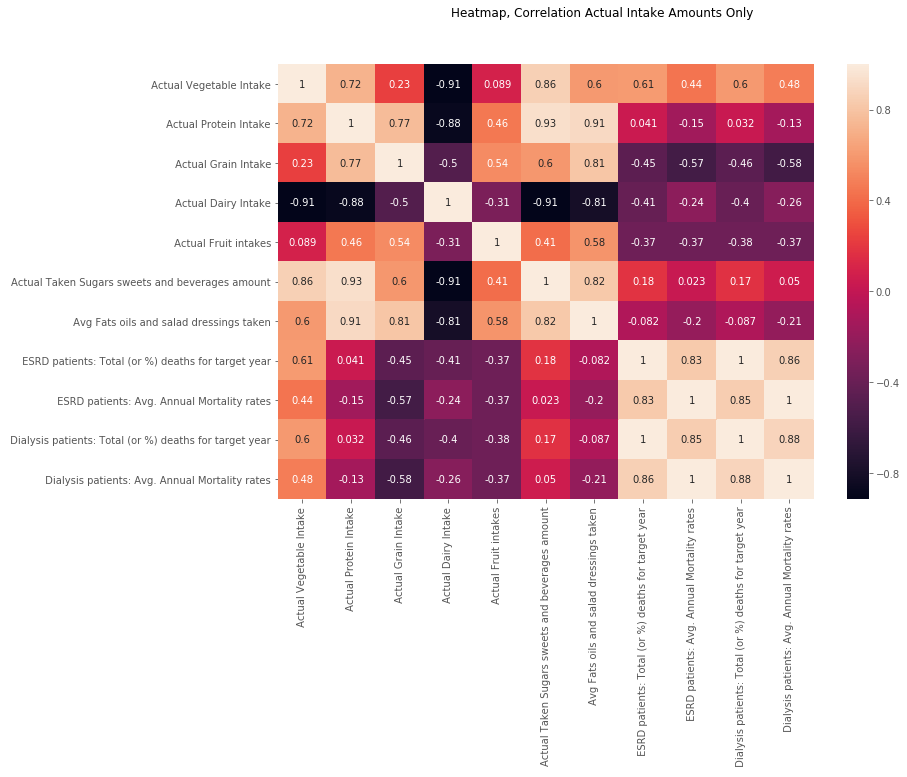

In [25]:
plt.figure(figsize=(12, 8))

corr = df_without_ages.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_actual_intake_amount' + '.png')            

# Will use Normalization all data 

In [26]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
df = df.drop([' Gender'], axis=1)
df.head()

age_from  age_to   Actual Vegetable Intake   Actual Protein Intake  \
0         0       4                    113.08                  125.47   
1         5       9                    136.70                  179.64   
2        10      13                    150.48                  215.61   
3        14      17                    154.13                  237.36   
4        18      21                    185.35                  279.75   

    Actual Grain Intake   Actual Dairy Intake   Actual Fruit intakes  \
0                196.71                477.94                 264.79   
1                328.76                368.55                 276.32   
2                371.43                355.67                 254.96   
3                377.23                324.62                 291.63   
4                378.87                241.78                 287.43   

   Actual Taken Sugars sweets and beverages amount  \
0                                           430.64   
1                                           759.43   
2                                           941.40   
3                                          1277.58   
4                                          1699.97   

    Avg Fats oils and salad dressings taken  \
0                                      8.77   
1                                     14.52   
2                                     21.31   
3                                     24.30   
4                                     25.54   

    ESRD patients: Total (or %) deaths for target year  \
0                                               32.0     
1                                               12.5     
2                                                8.0     
3                                               11.5     
4                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

In [27]:
# normalize data
df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
# df.head()

age_from    age_to   Actual Vegetable Intake   Actual Protein Intake  \
0 -0.485417 -0.481944                 -0.701544               -0.731780   
1 -0.422917 -0.419444                 -0.535789               -0.426132   
2 -0.360417 -0.369444                 -0.439088               -0.223175   
3 -0.310417 -0.319444                 -0.413474               -0.100453   
4 -0.260417 -0.269444                 -0.194386                0.138727   

    Actual Grain Intake   Actual Dairy Intake   Actual Fruit intakes  \
0             -0.672221              0.782794              -0.266679   
1             -0.072157              0.369861              -0.018455   
2              0.121745              0.321241              -0.478304   
3              0.148101              0.204032               0.311147   
4              0.155554             -0.108678               0.220727   

   Actual Taken Sugars sweets and beverages amount  \
0                                        -0.688696   
1                                        -0.519427   
2                                        -0.425744   
3                                        -0.252671   
4                                        -0.035214   

    Avg Fats oils and salad dressings taken  \
0                                 -0.681423   
1                                 -0.396487   
2                                 -0.060015   
3                                  0.088151   
4                                  0.149598   

    ESRD patients: Total (or %) deaths for target year  \
0                                          -0.326072     
1                                          -0.327367     
2                                          -0.327666     
3                                          -0.327433     
4                                          -0.324411     

    ESRD patients: Avg. Annual Mortality rates  \
0                                    -0.119448   
1                                    -0.212882   
2                                    -0.224207   
3                                    -0.222589   
4                                    -0.198725   

    Dialysis patients: Total (or %) deaths for target year  \
0                                          -0.331912         
1                                          -0.333408         
2                                          -0.333753         
3                                          -0.333561         
4                                          -0.330838         

    Dialysis patients: Avg. Annual Mortality rates  
0                                        -0.119809  
1                                        -0.188802  
2                                        -0.267082  
3                                        -0.264429  
4                                        -0.213613

In [28]:
df_normalized.corr()

age_from    age_to  \
age_from                                            1.000000  0.999792   
age_to                                              0.999792  1.000000   
 Actual Vegetable Intake                            0.812112  0.811140   
 Actual Protein Intake                              0.291400  0.285915   
 Actual Grain Intake                               -0.255409 -0.261402   
 Actual Dairy Intake                               -0.646477 -0.642236   
 Actual Fruit intakes                              -0.199925 -0.204636   
Actual Taken Sugars sweets and beverages amount     0.461752  0.460212   
 Avg Fats oils and salad dressings taken            0.181850  0.172085   
 ESRD patients: Total (or %) deaths for target ...  0.907545  0.907790   
 ESRD patients: Avg. Annual Mortality rates         0.854841  0.854759   
 Dialysis patients: Total (or %) deaths for tar...  0.914524  0.914723   
 Dialysis patients: Avg. Annual Mortality rates     0.878659  0.879439   

                                                     Actual Vegetable Intake  \
age_from                                                            0.812112   
age_to                                                              0.811140   
 Actual Vegetable Intake                                            1.000000   
 Actual Protein Intake                                              0.718591   
 Actual Grain Intake                                                0.232392   
 Actual Dairy Intake                                               -0.912659   
 Actual Fruit intakes                                               0.089207   
Actual Taken Sugars sweets and beverages amount                     0.861993   
 Avg Fats oils and salad dressings taken                            0.597893   
 ESRD patients: Total (or %) deaths for target ...                  0.606775   
 ESRD patients: Avg. Annual Mortality rates                         0.444925   
 Dialysis patients: Total (or %) deaths for tar...                  0.603179   
 Dialysis patients: Avg. Annual Mortality rates                     0.480531   

                                                     Actual Protein Intake  \
age_from                                                          0.291400   
age_to                                                            0.285915   
 Actual Vegetable Intake                                          0.718591   
 Actual Protein Intake                                            1.000000   
 Actual Grain Intake                                              0.766020   
 Actual Dairy Intake                                             -0.875043   
 Actual Fruit intakes                                             0.456722   
Actual Taken Sugars sweets and beverages amount                   0.932837   
 Avg Fats oils and salad dressings taken                          0.908040   
 ESRD patients: Total (or %) deaths for target ...                0.040950   
 ESRD patients: Avg. Annual Mortality rates                      -0.151035   
 Dialysis patients: Total (or %) deaths for tar...                0.031982   
 Dialysis patients: Avg. Annual Mortality rates                  -0.134234   

                                                     Actual Grain Intake  \
age_from                                                       -0.255409   
age_to                                                         -0.261402   
 Actual Vegetable Intake                                        0.232392   
 Actual Protein Intake                                          0.766020   
 Actual Grain Intake                                            1.000000   
 Actual Dairy Intake                                           -0.501747   
 Actual Fruit intakes                                           0.540745   
Actual Taken Sugars sweets and beverages amount                 0.595959   
 Avg Fats oils and salad dressings taken                        0.809486   
 ESRD patients: Total (or %) deaths for t

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
ESRD patients: Total (or %) deaths for target year	0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052
ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000                

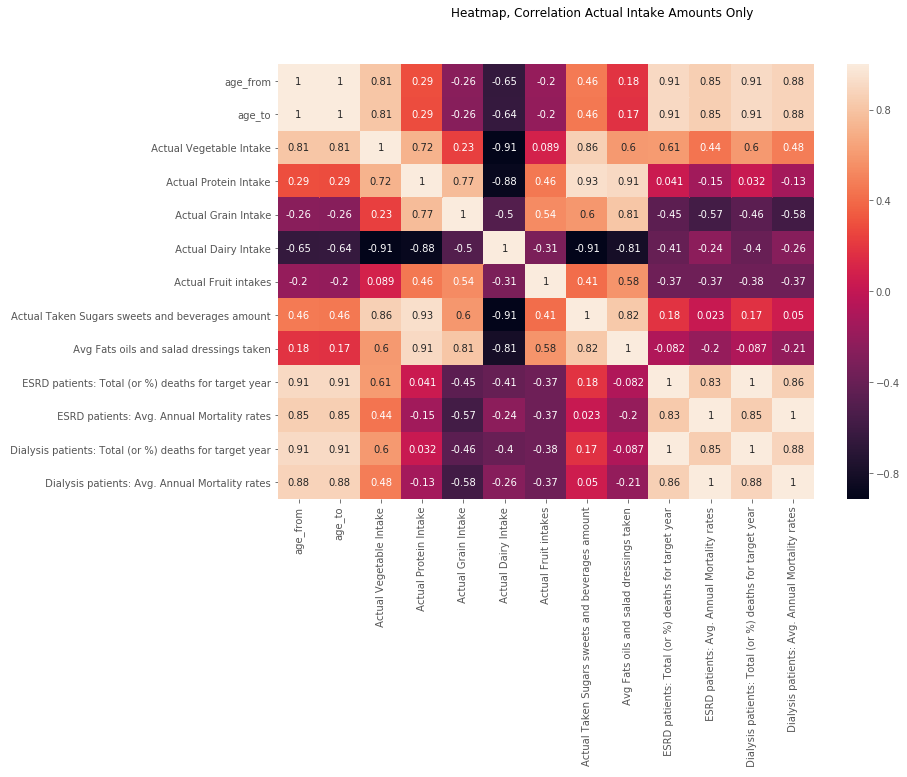

In [29]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_normalized_actual_intake_amount' + '.png')            

# Will check only on the difference from average recommended amount

In [30]:
df = pd.read_csv('copy-only-diff-no-empty-data-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

age_from  age_to   Gender   Actual Vegetable Intake  \
0         0       4  Neutral                    113.08   
1         5       9  Neutral                    136.70   
2        10      13  Neutral                    150.48   
3        14      17  Neutral                    154.13   
4        18      21  Neutral                    185.35   

    Actual Protein Intake   Actual Grain Intake   Actual Dairy Intake  \
0                  125.47                196.71                477.94   
1                  179.64                328.76                368.55   
2                  215.61                371.43                355.67   
3                  237.36                377.23                324.62   
4                  279.75                378.87                241.78   

    Actual Fruit intakes  Actual Taken Sugars sweets and beverages amount  \
0                 264.79                                           430.64   
1                 276.32                                           759.43   
2                 254.96                                           941.40   
3                 291.63                                          1277.58   
4                 287.43                                          1699.97   

    Avg Fats oils and salad dressings taken  Diff Vegetable  diff protein  \
0                                      8.77        -76.2950      -268.280   
1                                     14.52       -203.6125      -476.610   
2                                     21.31       -249.5200      -590.640   
3                                     24.30       -358.3700      -662.640   
4                                     25.54       -345.9000      -648.375   

   diff grain  diff dairy  diff fruit  \
0     -313.29      192.94      111.04   
1     -466.24      -51.45       58.82   
2     -603.57      -94.33       -7.54   
3     -747.77     -125.38       -8.37   
4     -802.13     -208.22      -12.57   

    ESRD patients: Total (or %) deaths for target year  \
0                                               32.0     
1                                               12.5     
2                                                8.0     
3                                               11.5     
4                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

In [31]:
df.describe()

age_from     age_to   Actual Vegetable Intake   Actual Protein Intake  \
count  18.000000  18.000000                 18.000000               18.000000   
mean   38.833333  42.555556                213.050000              255.163333   
std    25.011174  25.270821                 45.107202               47.794494   
min     0.000000   4.000000                113.080000              125.470000   
25%    19.000000  21.750000                193.067500              230.107500   
50%    37.500000  41.500000                227.645000              276.730000   
75%    58.750000  62.750000                244.740000              283.252500   
max    80.000000  84.000000                255.580000              302.700000   

        Actual Grain Intake   Actual Dairy Intake   Actual Fruit intakes  \
count             18.000000             18.000000              18.000000   
mean             344.638889            270.570000             277.177222   
std               56.478770             68.923649              13.995194   
min              196.710000            213.030000             254.960000   
25%              323.270000            228.692500             265.335000   
50%              350.920000            246.145000             277.275000   
75%              378.460000            271.137500             287.125000   
max              416.770000            477.940000             301.410000   

       Actual Taken Sugars sweets and beverages amount  \
count                                         18.00000   
mean                                        1768.37000   
std                                          584.28686   
min                                          430.64000   
25%                                         1492.15750   
50%                                         1952.06500   
75%                                         2236.91750   
max                                         2373.05000   

        Avg Fats oils and salad dressings taken  Diff Vegetable  diff protein  \
count                                 18.000000       18.000000     18.000000   
mean                                  22.521111     -250.439583   -597.024167   
std                                    4.847512       69.417808     92.304078   
min                                    8.770000     -358.370000   -669.700000   
25%                                   20.710000     -292.920000   -638.985000   
50%                                   24.380000     -243.151250   -617.715000   
75%                                   25.217500     -204.931250   -600.312500   
max                                   28.950000      -76.295000   -268.280000   

       diff grain  diff dairy  diff fruit  \
count   18.000000   18.000000   18.000000   
mean  -703.472222 -168.596667   -8.031111   
std    126.052129  103.207780   37.229019   
min   -802.130000 -236.970000  -44.260000   
25%   -774.087500 -221.307500  -24.047500   
50%   -731.765000 -203.855000  -16.710000   
75%   -714.947500 -178.862500   -6.542500   
max   -313.290000  192.940000  111.040000   

        ESRD patients: Total (or %) deaths for target year  \
count                                          18.000000     
mean                                         4941.333333     
std                                          5945.081086     
min                                             8.000000     
25%                                            66.500000     
50%                                          1472.500000     
75%                                         10706.875000     
max                                         15064.000000     

        ESRD patients: Avg. Annual Mortality rates  \
count                                    18.000000   
mean                                      8.819722   
std                                      10.055486   
min                                       0.505000   
25%                                       2.207500   
50%                                       4.452500 

In [32]:
# find correlation with price after standardization
df.corr()

age_from    age_to  \
age_from                                            1.000000  0.999792   
age_to                                              0.999792  1.000000   
 Actual Vegetable Intake                            0.812112  0.811140   
 Actual Protein Intake                              0.291400  0.285915   
 Actual Grain Intake                               -0.255409 -0.261402   
 Actual Dairy Intake                               -0.646477 -0.642236   
 Actual Fruit intakes                              -0.199925 -0.204636   
Actual Taken Sugars sweets and beverages amount     0.461752  0.460212   
 Avg Fats oils and salad dressings taken            0.181850  0.172085   
Diff Vegetable                                      0.201274  0.213052   
diff protein                                       -0.496676 -0.486598   
diff grain                                         -0.528710 -0.519005   
diff dairy                                         -0.600870 -0.595078   
diff fruit                                         -0.678582 -0.671874   
 ESRD patients: Total (or %) deaths for target ...  0.907545  0.907790   
 ESRD patients: Avg. Annual Mortality rates         0.854841  0.854759   
 Dialysis patients: Total (or %) deaths for tar...  0.914524  0.914723   
 Dialysis patients: Avg. Annual Mortality rates     0.878659  0.879439   

                                                     Actual Vegetable Intake  \
age_from                                                            0.812112   
age_to                                                              0.811140   
 Actual Vegetable Intake                                            1.000000   
 Actual Protein Intake                                              0.718591   
 Actual Grain Intake                                                0.232392   
 Actual Dairy Intake                                               -0.912659   
 Actual Fruit intakes                                               0.089207   
Actual Taken Sugars sweets and beverages amount                     0.861993   
 Avg Fats oils and salad dressings taken                            0.597893   
Diff Vegetable                                                     -0.124003   
diff protein                                                       -0.631116   
diff grain                                                         -0.725649   
diff dairy                                                         -0.846852   
diff fruit                                                         -0.781437   
 ESRD patients: Total (or %) deaths for target ...                  0.606775   
 ESRD patients: Avg. Annual Mortality rates                         0.444925   
 Dialysis patients: Total (or %) deaths for tar...                  0.603179   
 Dialysis patients: Avg. Annual Mortality rates                     0.480531   

                                                     Actual Protein Intake  \
age_from                                                          0.291400   
age_to                                                            0.285915   
 Actual Vegetable Intake                                          0.718591   
 Actual Protein Intake                                            1.000000   
 Actual Grain Intake                                              0.766020   
 Actual Dairy Intake                                             -0.875043   
 Actual Fruit intakes                                             0.456722   
Actual Taken Sugars sweets and beverages amount                   0.932837   
 Avg Fats oils and salad dressings taken                          0.908040   
Diff Vegetable                                                   -0.636333   
diff protein                                                     -0.704446   
diff grain                                                       -0.803727   
diff dairy                                                       -0.866574   
diff fruit                      

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	Diff Vegetable	diff protein	diff grain	diff dairy	diff fruit	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
                ESRD patients: Total (or %) deaths for target year	
                
                
 0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	0.426499	-0.273596	-0.268453	-0.364665	-0.488155	1.000000	0.828148	0.999315	0.864052

ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.359590	-0.266776	-0.263227	-0.213864	-0.392090	0.828148	1.000000	0.847294	0.995676


Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.424340	-0.278817	-0.272938	-0.362140	-0.489873	0.999315	0.847294	1.000000	0.880927


Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.401294	-0.244088	-0.246893	-0.229239	-0.387759	0.864052	0.995676	0.880927	1.000000
    
                

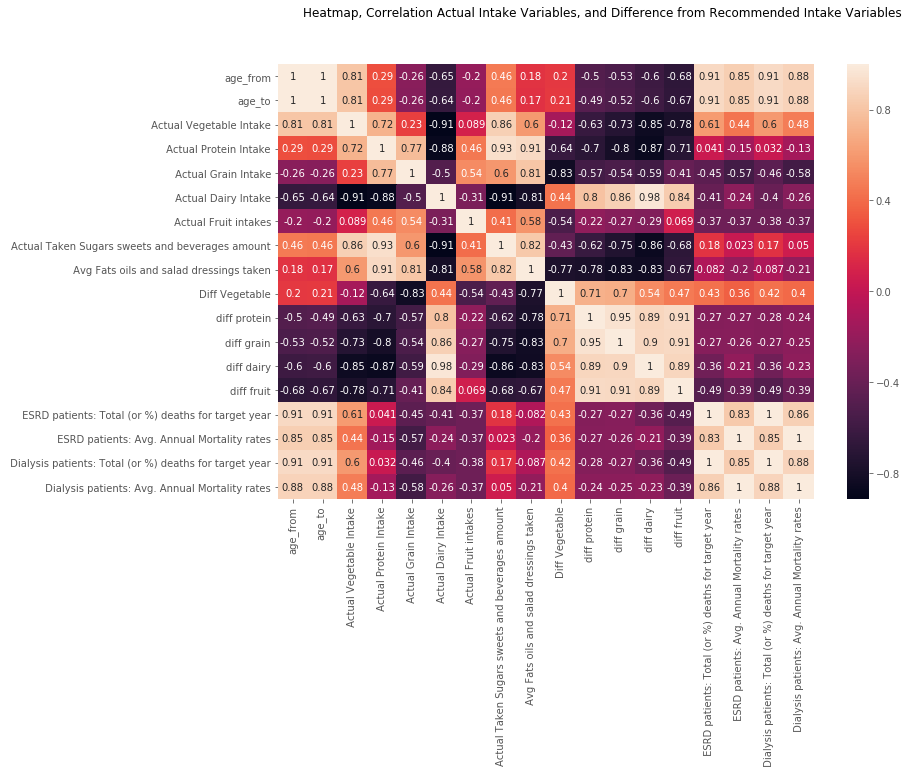

In [33]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');

In [34]:
df.head()
df = df.drop([' Gender'], axis=1)
df.head()

age_from  age_to   Actual Vegetable Intake   Actual Protein Intake  \
0         0       4                    113.08                  125.47   
1         5       9                    136.70                  179.64   
2        10      13                    150.48                  215.61   
3        14      17                    154.13                  237.36   
4        18      21                    185.35                  279.75   

    Actual Grain Intake   Actual Dairy Intake   Actual Fruit intakes  \
0                196.71                477.94                 264.79   
1                328.76                368.55                 276.32   
2                371.43                355.67                 254.96   
3                377.23                324.62                 291.63   
4                378.87                241.78                 287.43   

   Actual Taken Sugars sweets and beverages amount  \
0                                           430.64   
1                                           759.43   
2                                           941.40   
3                                          1277.58   
4                                          1699.97   

    Avg Fats oils and salad dressings taken  Diff Vegetable  diff protein  \
0                                      8.77        -76.2950      -268.280   
1                                     14.52       -203.6125      -476.610   
2                                     21.31       -249.5200      -590.640   
3                                     24.30       -358.3700      -662.640   
4                                     25.54       -345.9000      -648.375   

   diff grain  diff dairy  diff fruit  \
0     -313.29      192.94      111.04   
1     -466.24      -51.45       58.82   
2     -603.57      -94.33       -7.54   
3     -747.77     -125.38       -8.37   
4     -802.13     -208.22      -12.57   

    ESRD patients: Total (or %) deaths for target year  \
0                                               32.0     
1                                               12.5     
2                                                8.0     
3                                               11.5     
4                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

In [35]:
# normalize data

df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
#df.head()

age_from    age_to   Actual Vegetable Intake   Actual Protein Intake  \
0 -0.485417 -0.481944                 -0.701544               -0.731780   
1 -0.422917 -0.419444                 -0.535789               -0.426132   
2 -0.360417 -0.369444                 -0.439088               -0.223175   
3 -0.310417 -0.319444                 -0.413474               -0.100453   
4 -0.260417 -0.269444                 -0.194386                0.138727   

    Actual Grain Intake   Actual Dairy Intake   Actual Fruit intakes  \
0             -0.672221              0.782794              -0.266679   
1             -0.072157              0.369861              -0.018455   
2              0.121745              0.321241              -0.478304   
3              0.148101              0.204032               0.311147   
4              0.155554             -0.108678               0.220727   

   Actual Taken Sugars sweets and beverages amount  \
0                                        -0.688696   
1                                        -0.519427   
2                                        -0.425744   
3                                        -0.252671   
4                                        -0.035214   

    Avg Fats oils and salad dressings taken  Diff Vegetable  diff protein  \
0                                 -0.681423        0.617370      0.818953   
1                                 -0.396487        0.166009      0.299971   
2                                 -0.060015        0.003260      0.015904   
3                                  0.088151       -0.382630     -0.163459   
4                                  0.149598       -0.338422     -0.127923   

   diff grain  diff dairy  diff fruit  \
0    0.798180    0.840959    0.766717   
1    0.485296    0.272491    0.430464   
2    0.204366    0.172749    0.003162   
3   -0.090618    0.100525   -0.002182   
4   -0.201820   -0.092167   -0.029227   

    ESRD patients: Total (or %) deaths for target year  \
0                                          -0.326072     
1                                          -0.327367     
2                                          -0.327666     
3                                          -0.327433     
4                                          -0.324411     

    ESRD patients: Avg. Annual Mortality rates  \
0                                    -0.119448   
1                                    -0.212882   
2                                    -0.224207   
3                                    -0.222589   
4                                    -0.198725   

    Dialysis patients: Total (or %) deaths for target year  \
0                                          -0.331912         
1                                          -0.333408         
2                                          -0.333753         
3                                          -0.333561         
4                                          -0.330838         

    Dialysis patients: Avg. Annual Mortality rates  
0                                        -0.119809  
1                                        -0.188802  
2                                        -0.267082  
3                                        -0.264429  
4                                        -0.213613

In [36]:
df_normalized.corr()

age_from    age_to  \
age_from                                            1.000000  0.999792   
age_to                                              0.999792  1.000000   
 Actual Vegetable Intake                            0.812112  0.811140   
 Actual Protein Intake                              0.291400  0.285915   
 Actual Grain Intake                               -0.255409 -0.261402   
 Actual Dairy Intake                               -0.646477 -0.642236   
 Actual Fruit intakes                              -0.199925 -0.204636   
Actual Taken Sugars sweets and beverages amount     0.461752  0.460212   
 Avg Fats oils and salad dressings taken            0.181850  0.172085   
Diff Vegetable                                      0.201274  0.213052   
diff protein                                       -0.496676 -0.486598   
diff grain                                         -0.528710 -0.519005   
diff dairy                                         -0.600870 -0.595078   
diff fruit                                         -0.678582 -0.671874   
 ESRD patients: Total (or %) deaths for target ...  0.907545  0.907790   
 ESRD patients: Avg. Annual Mortality rates         0.854841  0.854759   
 Dialysis patients: Total (or %) deaths for tar...  0.914524  0.914723   
 Dialysis patients: Avg. Annual Mortality rates     0.878659  0.879439   

                                                     Actual Vegetable Intake  \
age_from                                                            0.812112   
age_to                                                              0.811140   
 Actual Vegetable Intake                                            1.000000   
 Actual Protein Intake                                              0.718591   
 Actual Grain Intake                                                0.232392   
 Actual Dairy Intake                                               -0.912659   
 Actual Fruit intakes                                               0.089207   
Actual Taken Sugars sweets and beverages amount                     0.861993   
 Avg Fats oils and salad dressings taken                            0.597893   
Diff Vegetable                                                     -0.124003   
diff protein                                                       -0.631116   
diff grain                                                         -0.725649   
diff dairy                                                         -0.846852   
diff fruit                                                         -0.781437   
 ESRD patients: Total (or %) deaths for target ...                  0.606775   
 ESRD patients: Avg. Annual Mortality rates                         0.444925   
 Dialysis patients: Total (or %) deaths for tar...                  0.603179   
 Dialysis patients: Avg. Annual Mortality rates                     0.480531   

                                                     Actual Protein Intake  \
age_from                                                          0.291400   
age_to                                                            0.285915   
 Actual Vegetable Intake                                          0.718591   
 Actual Protein Intake                                            1.000000   
 Actual Grain Intake                                              0.766020   
 Actual Dairy Intake                                             -0.875043   
 Actual Fruit intakes                                             0.456722   
Actual Taken Sugars sweets and beverages amount                   0.932837   
 Avg Fats oils and salad dressings taken                          0.908040   
Diff Vegetable                                                   -0.636333   
diff protein                                                     -0.704446   
diff grain                                                       -0.803727   
diff dairy                                                       -0.866574   
diff fruit                      

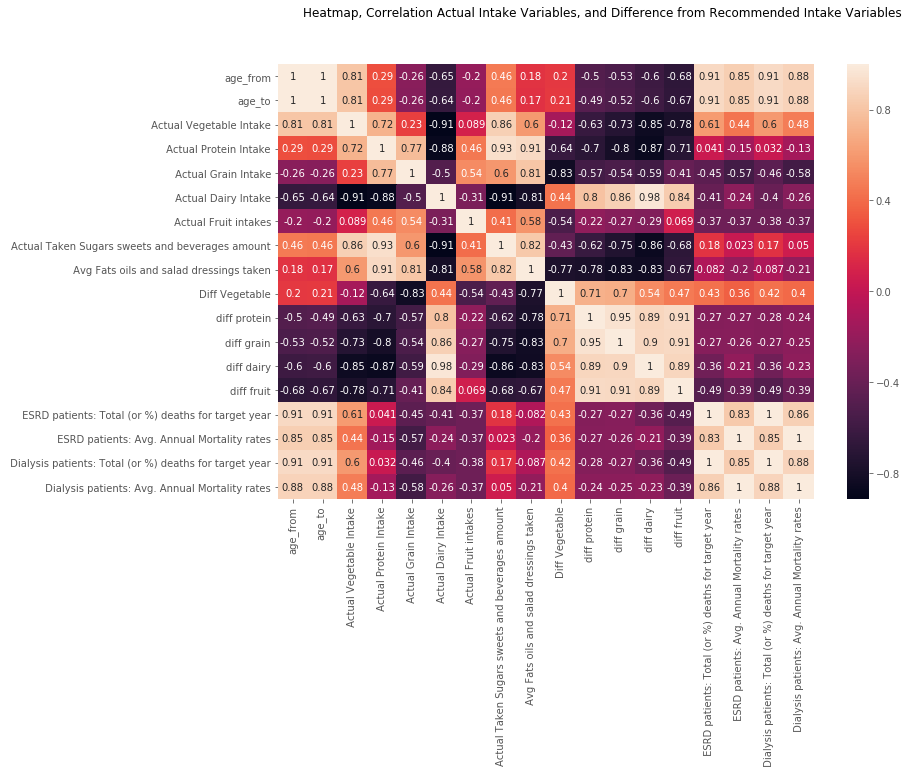

In [37]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_diff_intake_amount_normalized' + '.png')            

# Bivariate

# The most important for Bivariate: bivariate_diff_norm.png and bivariate_diff_norm_rate_only.png. Difference in intake amounts from recommended, also normalized.



Bivariate plots on actual amount intake and target variables. will be saved in bivariate.png. The correlation pattern can be checked in the image saved

Correlation within the intake amounts do not say much as we are using actual intake amounts not differences with recomended amount. Also because, higher aged people will take higher amount. Also, normalized data will give true relation.

The correlation was shown above. Now linearity and non-linearity can be seen using the Bivariate plots. 

The plots show similarity with correlation

In [38]:
import numpy as np 
import pandas as pd 

from IPython.display import display, HTML

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline

# ref in ref section

# On Actual intake Amounts

In [39]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual = df.drop([' Gender', 'age_from', 'age_to'], axis=1)
df_actual.head()

Actual Vegetable Intake   Actual Protein Intake   Actual Grain Intake  \
0                    113.08                  125.47                196.71   
1                    136.70                  179.64                328.76   
2                    150.48                  215.61                371.43   
3                    154.13                  237.36                377.23   
4                    185.35                  279.75                378.87   

    Actual Dairy Intake   Actual Fruit intakes  \
0                477.94                 264.79   
1                368.55                 276.32   
2                355.67                 254.96   
3                324.62                 291.63   
4                241.78                 287.43   

   Actual Taken Sugars sweets and beverages amount  \
0                                           430.64   
1                                           759.43   
2                                           941.40   
3                                          1277.58   
4                                          1699.97   

    Avg Fats oils and salad dressings taken  \
0                                      8.77   
1                                     14.52   
2                                     21.31   
3                                     24.30   
4                                     25.54   

    ESRD patients: Total (or %) deaths for target year  \
0                                               32.0     
1                                               12.5     
2                                                8.0     
3                                               11.5     
4                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

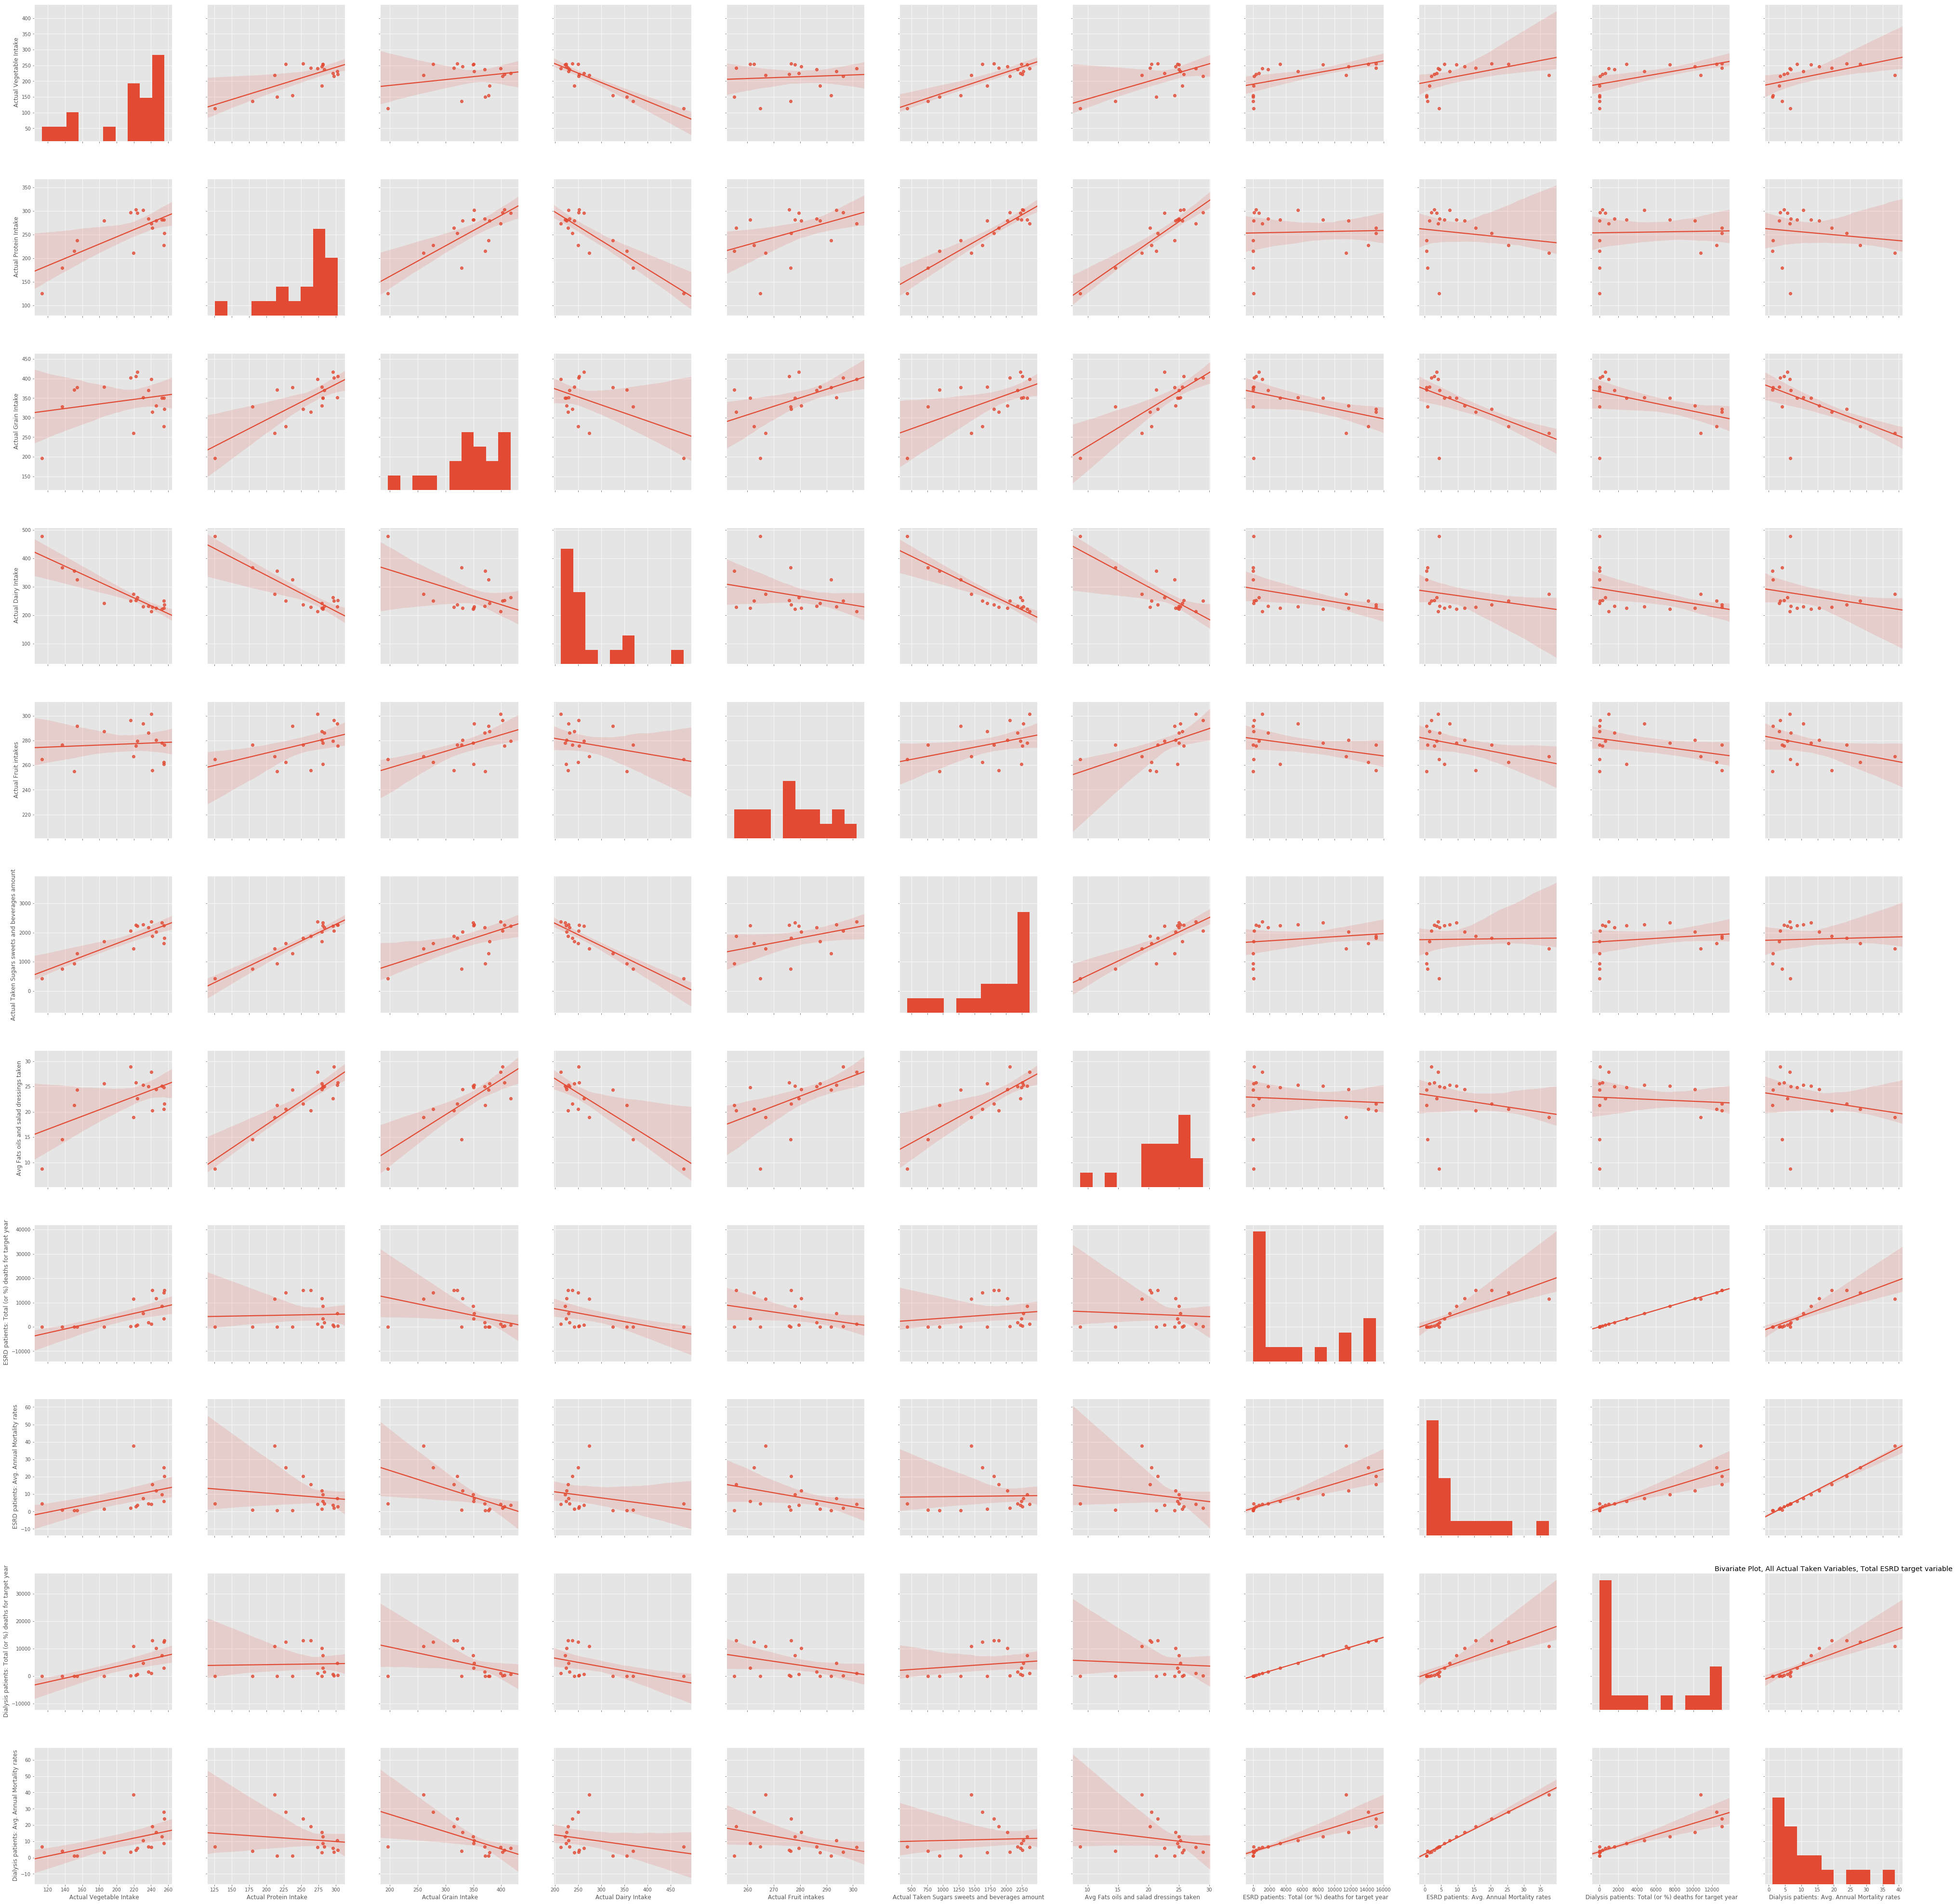

In [40]:
# on actual amounts
#plt.figure(figsize=(16, 300))
sns.pairplot(df_actual,   vars=df_actual.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_food_group' + '.png')            
plt.show()

# On difference from recommended amount (data not normalized)

In [41]:
df = pd.read_csv('copy-only-diff-no-actual-no-empty-cell-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

age_from  age_to  Diff Vegetable  diff protein  diff grain  diff dairy  \
0         0       4        -76.2950      -268.280     -313.29      192.94   
1         5       9       -203.6125      -476.610     -466.24      -51.45   
2        10      13       -249.5200      -590.640     -603.57      -94.33   
3        14      17       -358.3700      -662.640     -747.77     -125.38   
4        18      21       -345.9000      -648.375     -802.13     -208.22   

   diff fruit   ESRD patients: Total (or %) deaths for target year  \
0      111.04                                               32.0     
1       58.82                                               12.5     
2       -7.54                                                8.0     
3       -8.37                                               11.5     
4      -12.57                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

In [42]:
# On difference from recommended amount (data not normalized)

#df_actual_diff = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual_diff.head()
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual_diff = df.drop(['age_from', 'age_to'], axis=1)
df_actual_diff.head()
#df.head()

Diff Vegetable  diff protein  diff grain  diff dairy  diff fruit  \
0        -76.2950      -268.280     -313.29      192.94      111.04   
1       -203.6125      -476.610     -466.24      -51.45       58.82   
2       -249.5200      -590.640     -603.57      -94.33       -7.54   
3       -358.3700      -662.640     -747.77     -125.38       -8.37   
4       -345.9000      -648.375     -802.13     -208.22      -12.57   

    ESRD patients: Total (or %) deaths for target year  \
0                                               32.0     
1                                               12.5     
2                                                8.0     
3                                               11.5     
4                                               57.0     

    ESRD patients: Avg. Annual Mortality rates  \
0                                        4.390   
1                                        0.925   
2                                        0.505   
3                                        0.565   
4                                        1.450   

    Dialysis patients: Total (or %) deaths for target year  \
0                                               27.5         
1                                                8.0         
2                                                3.5         
3                                                6.0         
4                                               41.5         

    Dialysis patients: Avg. Annual Mortality rates  
0                                            6.665  
1                                            4.065  
2                                            1.115  
3                                            1.215  
4                                            3.130

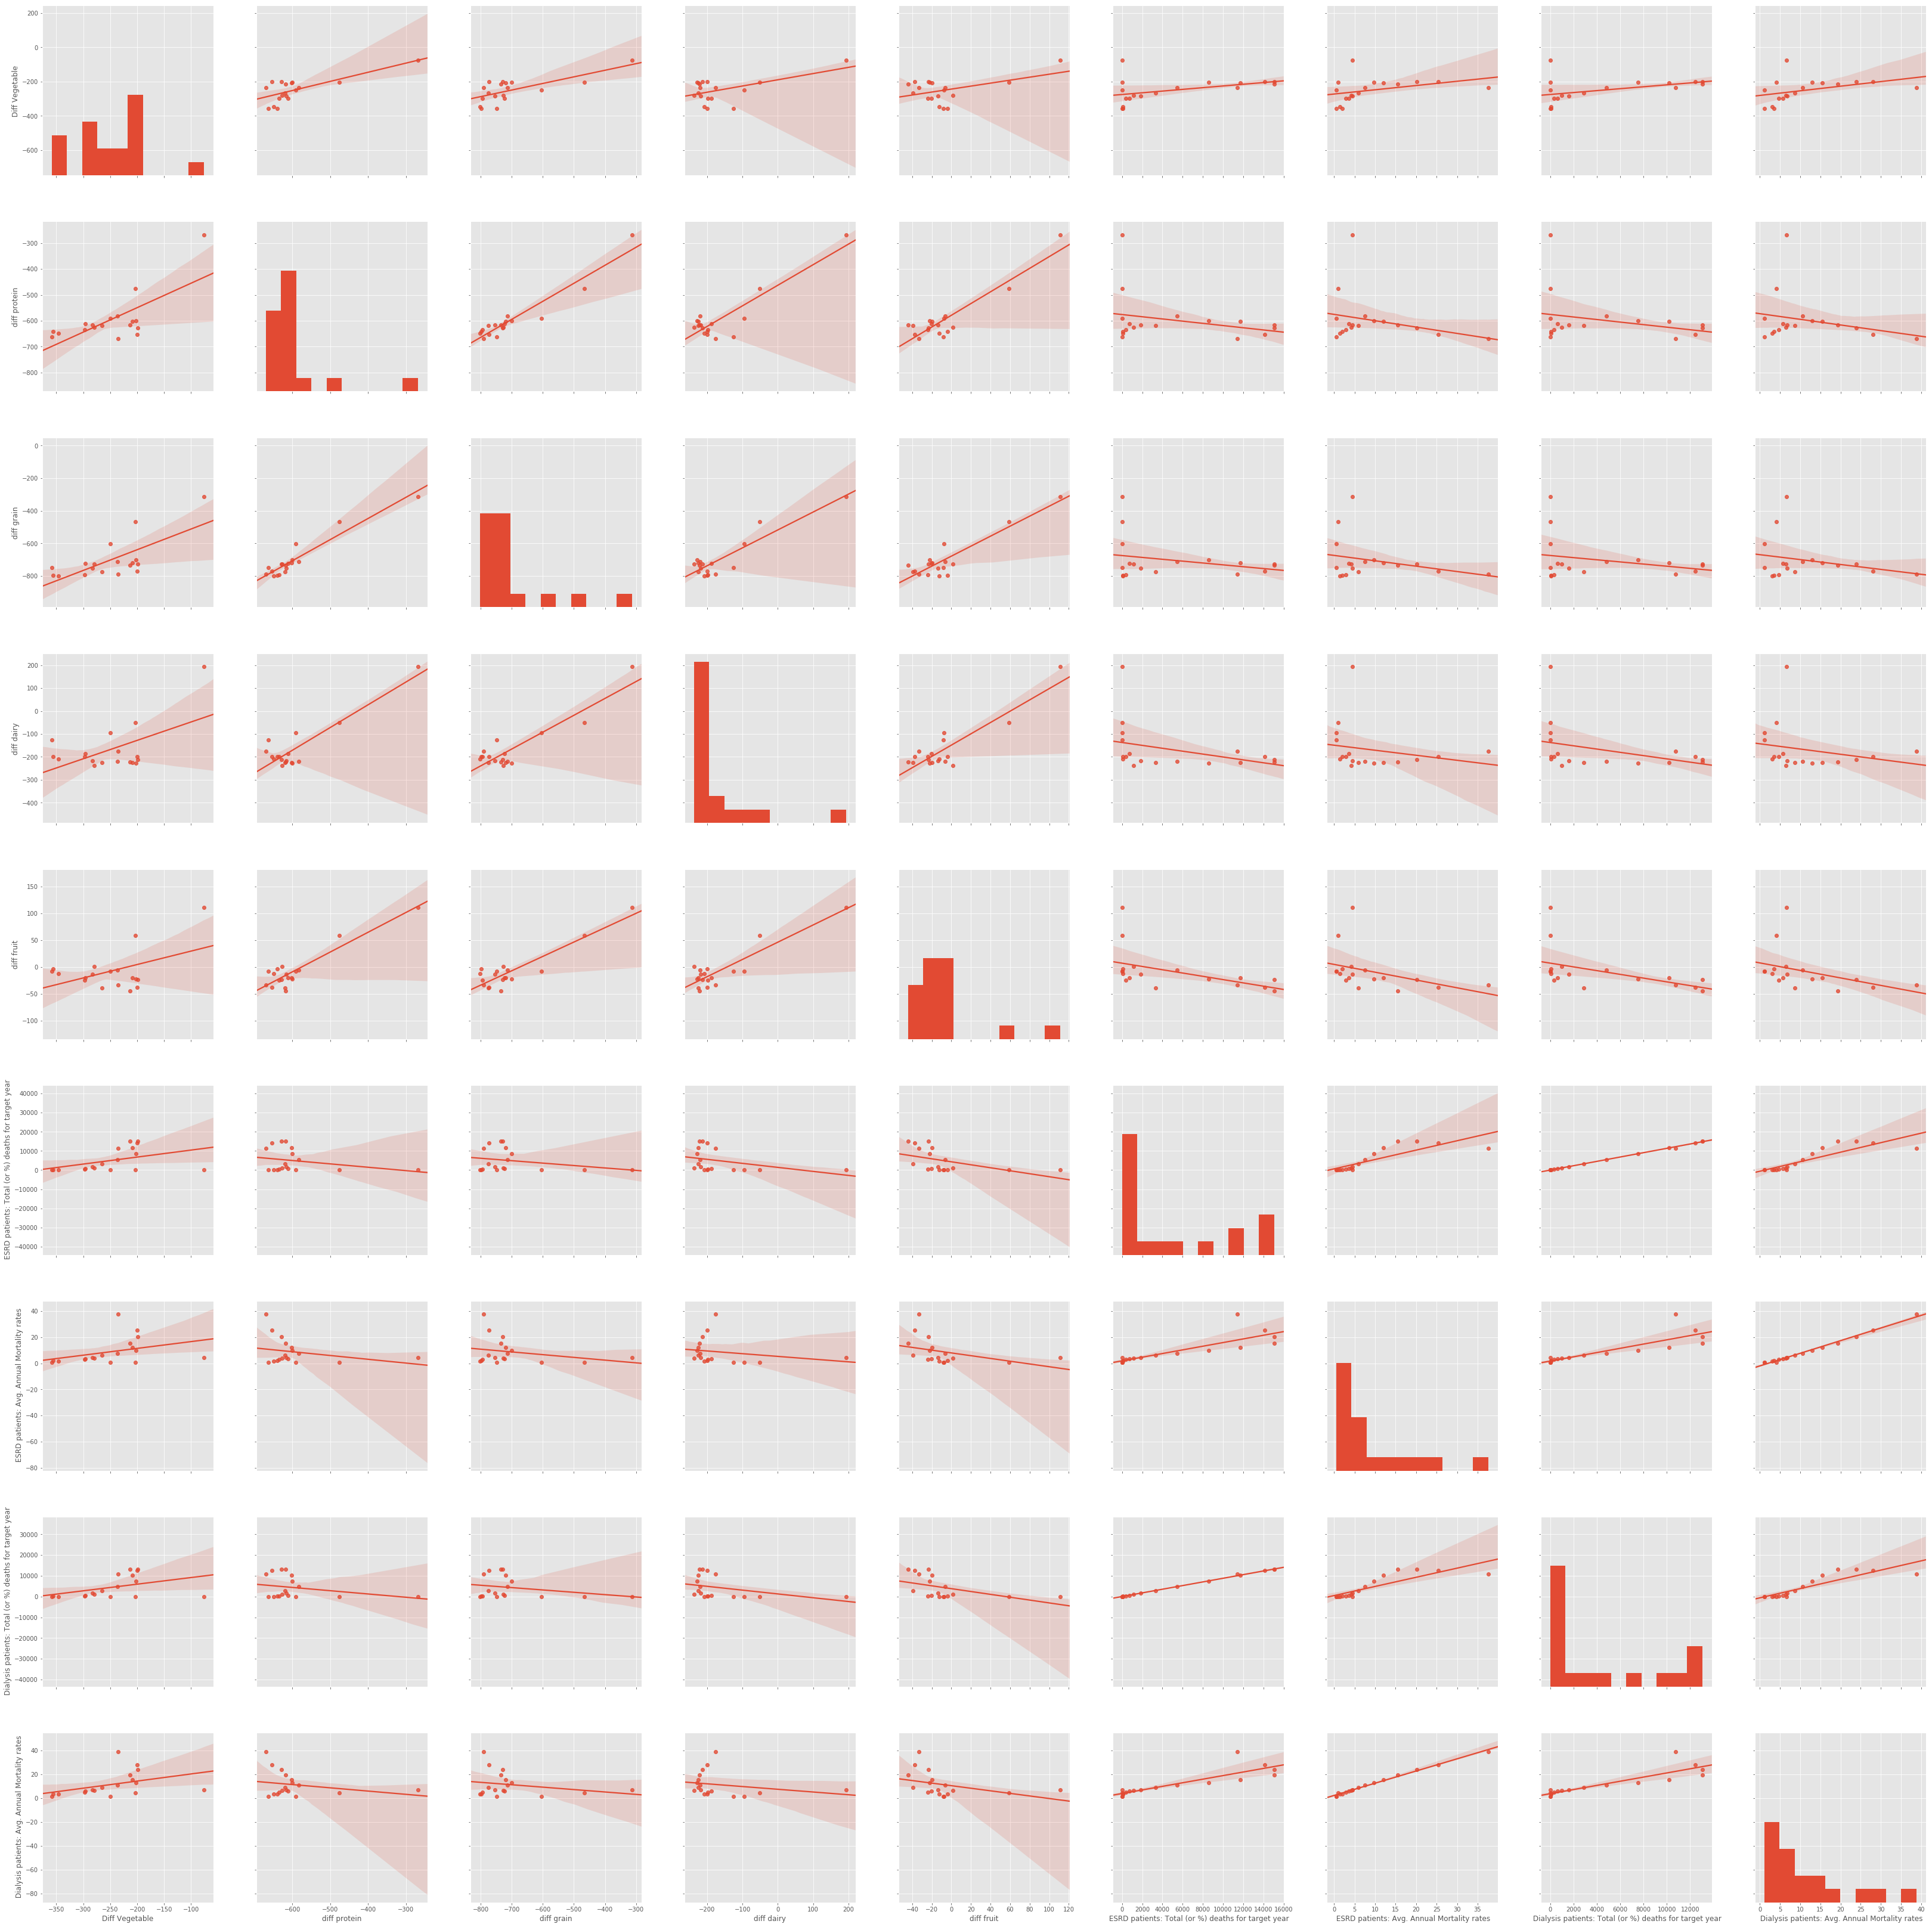

In [43]:
# On difference from recommended amount (data not normalized)

sns.pairplot(df_actual_diff,   vars=df_actual_diff.columns, size=5, kind='reg'); 
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff' + '.png')            
plt.show()


# On difference from recommended amount (data/diff normalized)

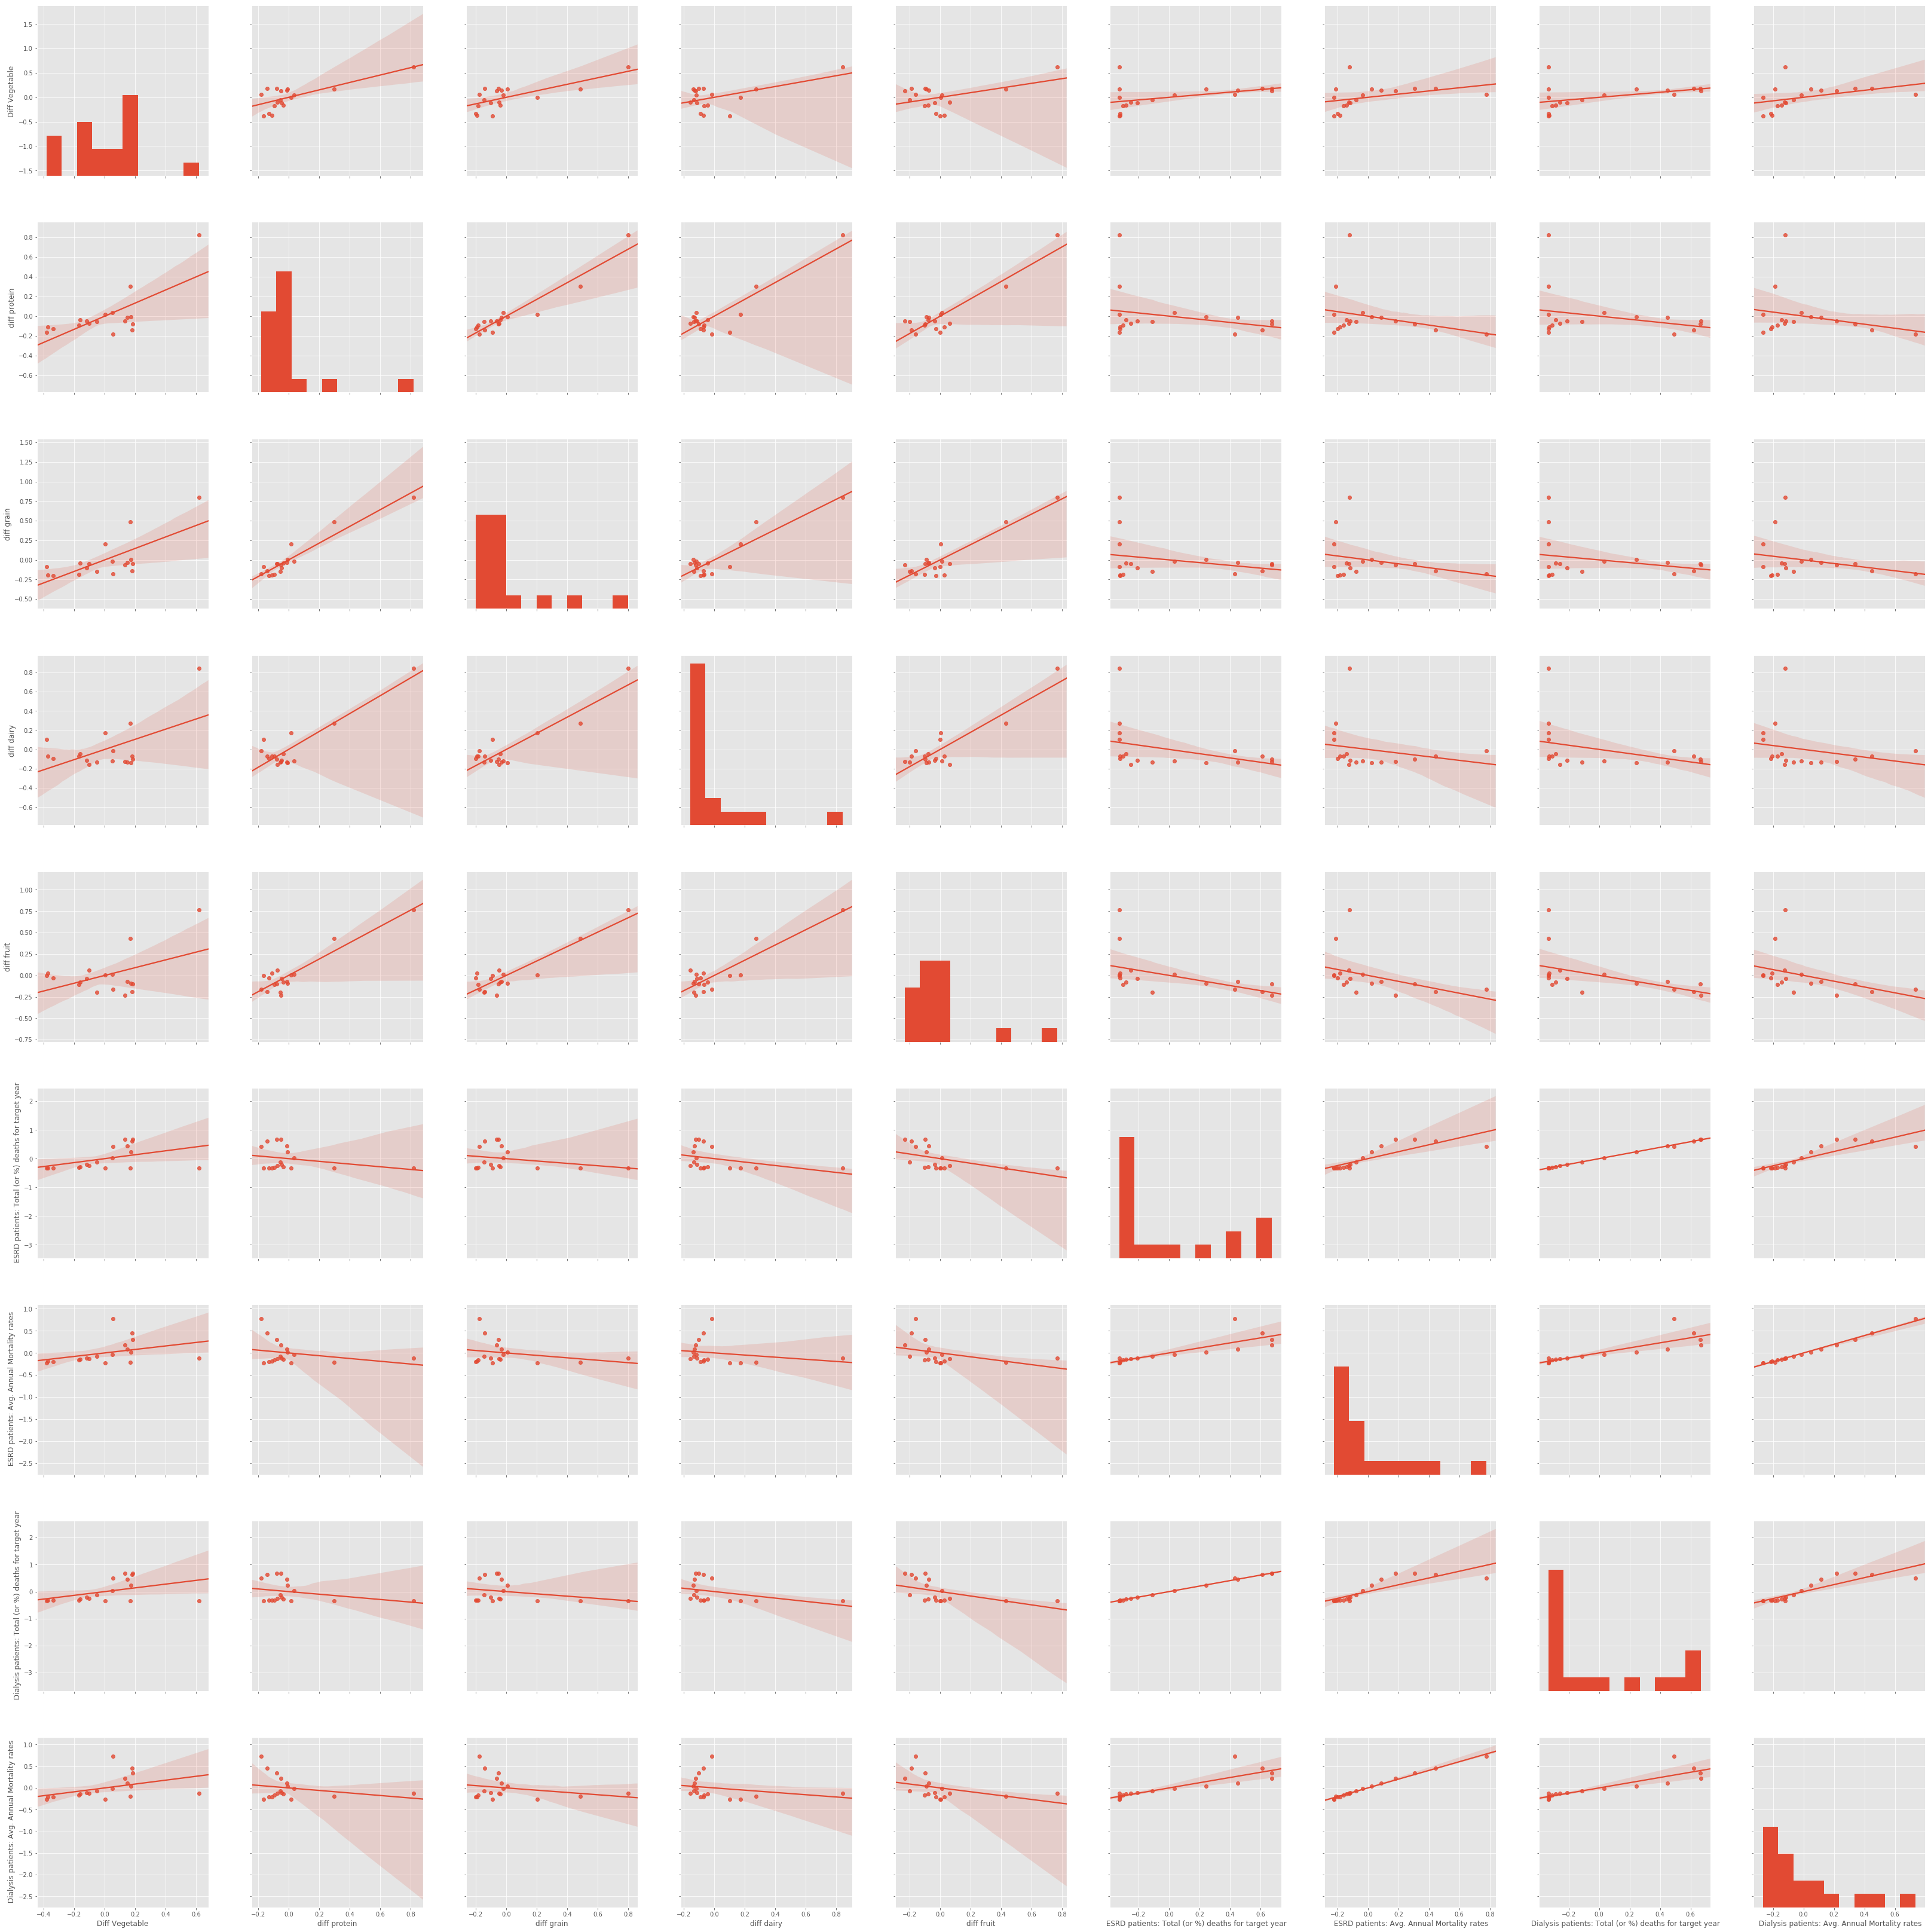

In [44]:
df_normalized_diff = (df_actual_diff - df_actual_diff.mean())/ (df_actual_diff.max() - df_actual_diff.min())
df_normalized_diff.head()

sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm' + '.png')            
plt.show()


In [45]:
df_normalized_diff = df_normalized_diff.drop([' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates'], axis=1)
df_normalized_diff.head()

Diff Vegetable  diff protein  diff grain  diff dairy  diff fruit  \
0        0.617370      0.818953    0.798180    0.840959    0.766717   
1        0.166009      0.299971    0.485296    0.272491    0.430464   
2        0.003260      0.015904    0.204366    0.172749    0.003162   
3       -0.382630     -0.163459   -0.090618    0.100525   -0.002182   
4       -0.338422     -0.127923   -0.201820   -0.092167   -0.029227   

    ESRD patients: Avg. Annual Mortality rates  
0                                    -0.119448  
1                                    -0.212882  
2                                    -0.224207  
3                                    -0.222589  
4                                    -0.198725

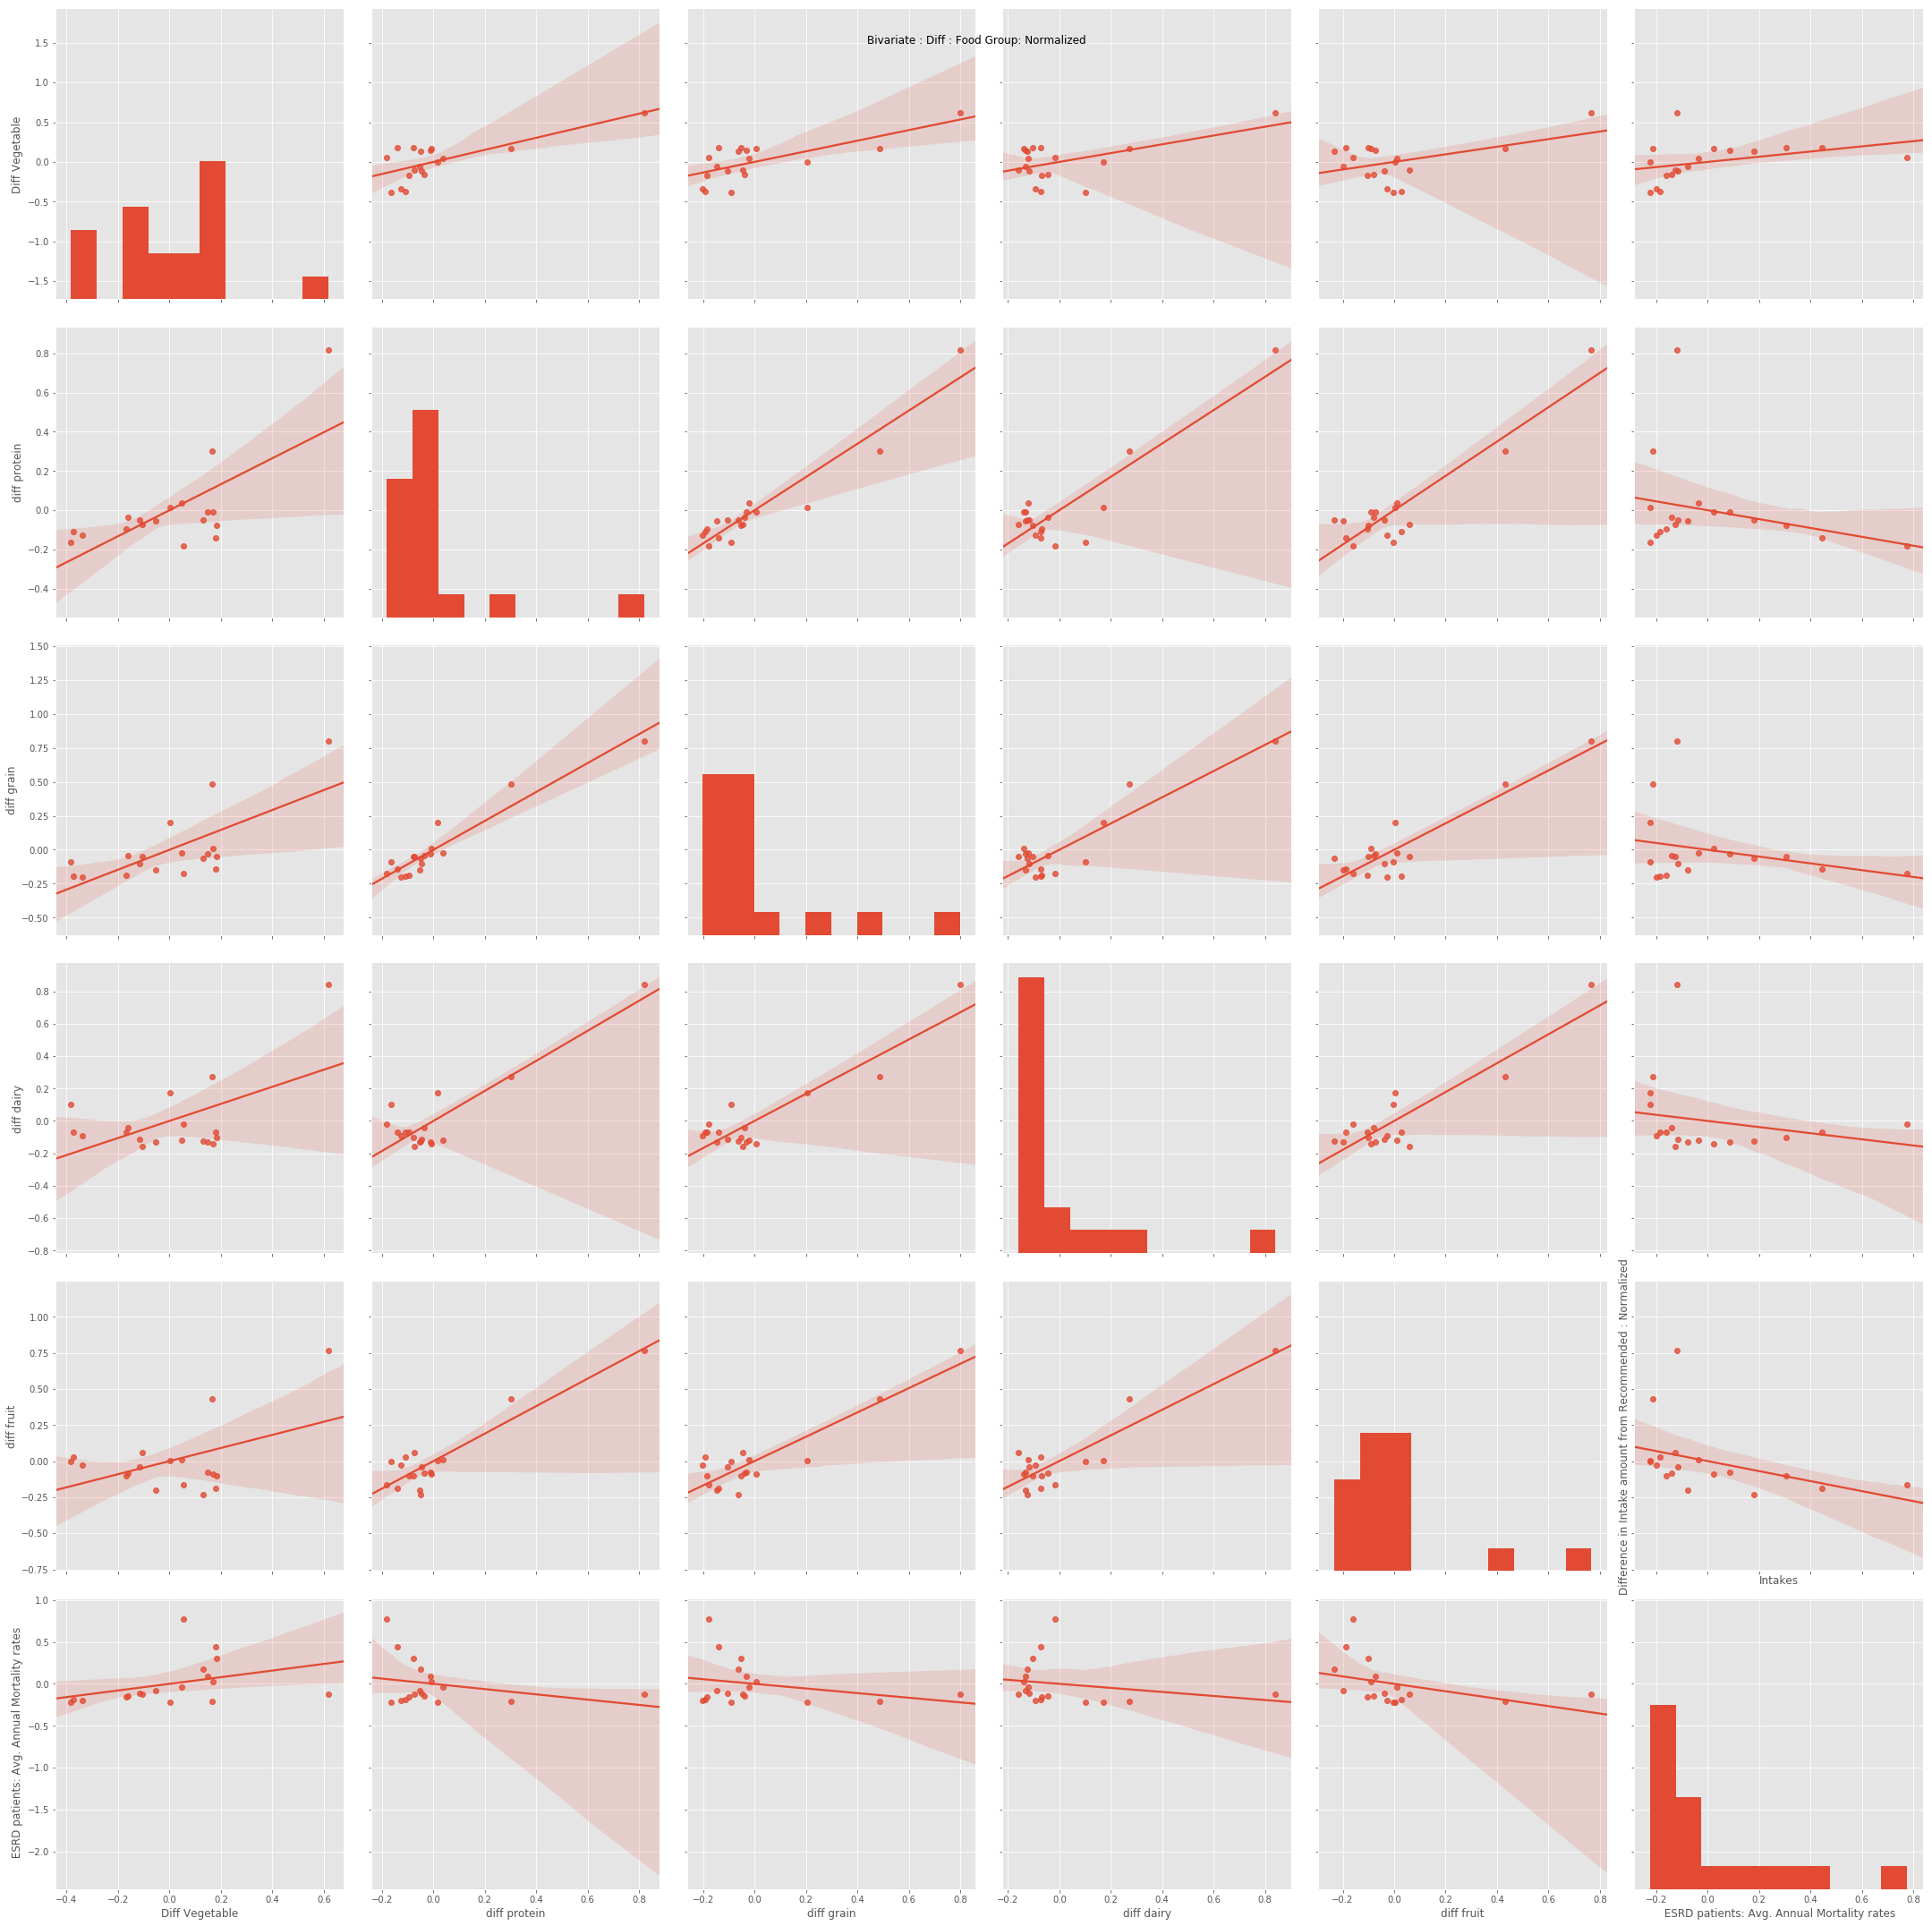

In [46]:
sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
plt.suptitle('Bivariate : Diff : Food Group: Normalized\n')
plt.ylabel('Difference in Intake amount from Recommended : Normalized')
plt.xlabel('Intakes')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm_rate_only' + '.png')            
plt.show()

In [47]:
# can be ignored
"""
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()

plt.figure(figsize=(14, 14))
sns.pairplot(df_esrdonly, diag_kind='kde');
plt.xlabel('Bivariate Plot, Difference from Recommended Variables, Total ESRD target variable');

#plt.figure(figsize=(16, 16))
plt.rcParams['figure.figsize'] = 16, 16
pd.plotting.scatter_matrix(df_esrdonly, diagonal="kde")
plt.suptitle('Scatter Matrix');
plt.show();
"""

'\ndf_esrdonly = df.drop([\'age_from\', \'age_to\',\' ESRD patients: Avg. Annual Mortality rates\', \' Dialysis patients: Total (or %) deaths for target year\', \' Dialysis patients: Avg. Annual Mortality rates\' ], axis=1)\ndf_esrdonly.head()\n\nplt.figure(figsize=(14, 14))\nsns.pairplot(df_esrdonly, diag_kind=\'kde\');\nplt.xlabel(\'Bivariate Plot, Difference from Recommended Variables, Total ESRD target variable\');\n\n#plt.figure(figsize=(16, 16))\nplt.rcParams[\'figure.figsize\'] = 16, 16\npd.plotting.scatter_matrix(df_esrdonly, diagonal="kde")\nplt.suptitle(\'Scatter Matrix\');\nplt.show();\n'

# PCA

Applying PCA on Difference data

In [48]:
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()
#df_esrdonly.head()

Diff Vegetable  diff protein  diff grain  diff dairy  diff fruit  \
0        -76.2950      -268.280     -313.29      192.94      111.04   
1       -203.6125      -476.610     -466.24      -51.45       58.82   
2       -249.5200      -590.640     -603.57      -94.33       -7.54   
3       -358.3700      -662.640     -747.77     -125.38       -8.37   
4       -345.9000      -648.375     -802.13     -208.22      -12.57   

    ESRD patients: Avg. Annual Mortality rates  
0                                        4.390  
1                                        0.925  
2                                        0.505  
3                                        0.565  
4                                        1.450

In [49]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

import sklearn 
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_esrdonly)
standardisedX = pd.DataFrame(standardisedX, index=df_esrdonly.index, columns=df_esrdonly.columns)
standardisedX.apply(np.mean)

Diff Vegetable                                -4.332954e-16
diff protein                                  -8.018277e-16
diff grain                                     5.366078e-16
diff dairy                                    -3.885781e-16
diff fruit                                    -9.251859e-17
 ESRD patients: Avg. Annual Mortality rates    1.480297e-16
dtype: float64

In [50]:
standardisedX.apply(np.std)

Diff Vegetable                                 1.0
diff protein                                   1.0
diff grain                                     1.0
diff dairy                                     1.0
diff fruit                                     1.0
 ESRD patients: Avg. Annual Mortality rates    1.0
dtype: float64

In [51]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary


In [53]:
summary = pca_summary(pca, standardisedX)

Importance of components:


sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           2.058141               0.705991              0.705991
PC2           1.160744               0.224555              0.930546
PC3           0.518853               0.044868              0.975414
PC4           0.297964               0.014797              0.990211
PC5           0.219833               0.008054              0.998265
PC6           0.102028               0.001735              1.000000

In [54]:
# First two component can define over 95% 

In [55]:
np.sum(summary.sdev**2)

Standard deviation    6.0
dtype: float64

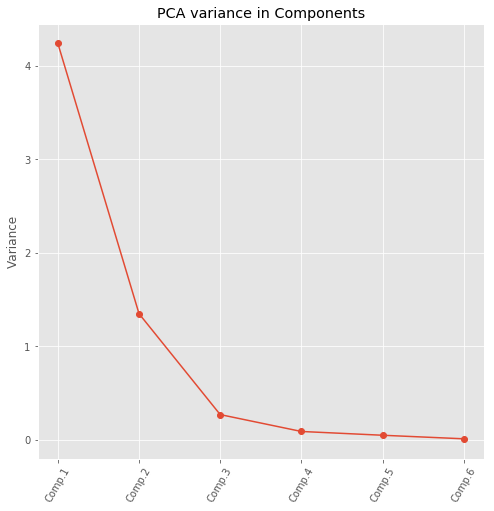

In [56]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
plt.rcParams['figure.figsize'] = 8, 8   

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()



screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            

In [57]:
# comp 2 to comp 3 is the most change - slope
# first two or at best first 3 can be retained

In [58]:
summary.sdev**2

Standard deviation
PC1            4.235946
PC2            1.347327
PC3            0.269208
PC4            0.088782
PC5            0.048327
PC6            0.010410

Can be retained

PC1	4.263124
PC2	1.449435


In [59]:
pca.components_[0]

array([ 0.33558246,  0.47787327,  0.4773956 ,  0.45412539,  0.45708252,
       -0.12633561])

In [60]:
np.sum(pca.components_[0]**2)

0.999999999999999

In [61]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [62]:
calcpc(standardisedX, pca.components_[0])

array([ 7.33661891,  3.2759593 ,  0.87786527, -0.76096561, -1.27436192,
       -1.11656647, -1.05210251, -0.55640492, -0.52219388, -0.70806478,
       -1.0803665 , -0.08831969, -0.22064849, -0.32119398, -0.82738023,
       -0.54845766, -1.0429077 , -1.37050914])

In [63]:
pca.transform(standardisedX)[:, 0]

array([ 7.33661891,  3.2759593 ,  0.87786527, -0.76096561, -1.27436192,
       -1.11656647, -1.05210251, -0.55640492, -0.52219388, -0.70806478,
       -1.0803665 , -0.08831969, -0.22064849, -0.32119398, -0.82738023,
       -0.54845766, -1.0429077 , -1.37050914])

In [64]:
pca.components_[1]

array([ 0.56910521,  0.00870248,  0.00721787, -0.03193287, -0.18125629,
        0.80132258])

In [65]:
np.sum(pca.components_[1]**2)

0.9999999999999991

highest loadings for

In [66]:
# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work

In [67]:
df_esrdonly[' ESRD patients: Avg. Annual Mortality rates']
sorted(standardisedX[' ESRD patients: Avg. Annual Mortality rates'])

[-0.8508567828409127,
 -0.8447169016030269,
 -0.8078776141757118,
 -0.7541536533442106,
 -0.6983830654334141,
 -0.6114014145633645,
 -0.5351645558596153,
 -0.478882311178995,
 -0.45329947268780396,
 -0.44050805344220845,
 -0.29059261988382884,
 -0.13095570769879675,
 0.08752173301597484,
 0.32902372837281824,
 0.681043586011607,
 1.1635359199554702,
 1.6915657064136536,
 2.9441014789423674]

In [68]:
# Define high and low mortality

In [69]:
y = df_esrdonly[' ESRD patients: Avg. Annual Mortality rates'] #< 0.5
# from normalized data. > 0.5 = high mortality
print('as the older age show higher mortality, does it mean th')
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y


as the older age show higher mortality, does it mean th


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
Name:  ESRD patients: Avg. Annual Mortality rates, dtype: bool

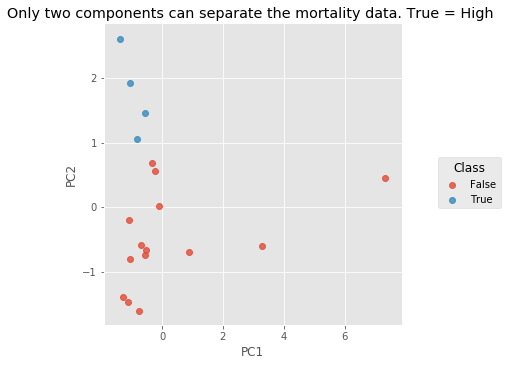

In [70]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_esrdonly[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2
pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Only two components can separate the mortality data. True = High ')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            


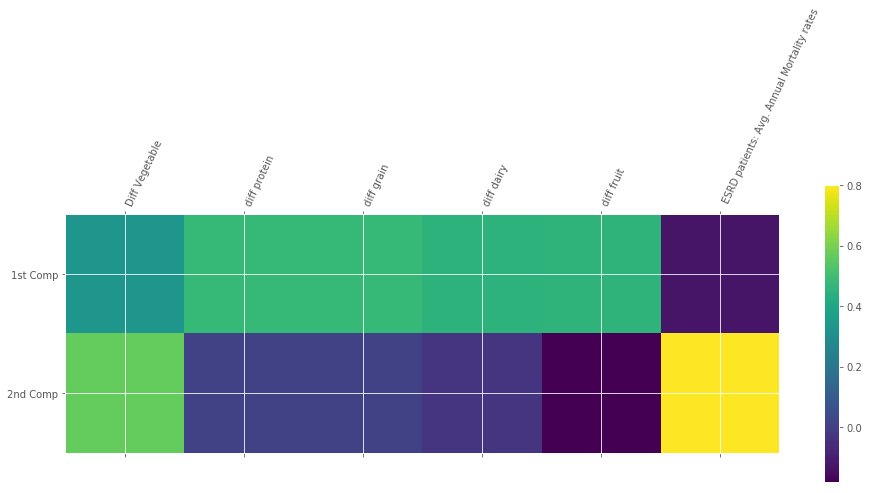

In [71]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(df_esrdonly.columns)),df_esrdonly.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

In [72]:
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

# How the intake differences contributed for the affecting PCA components

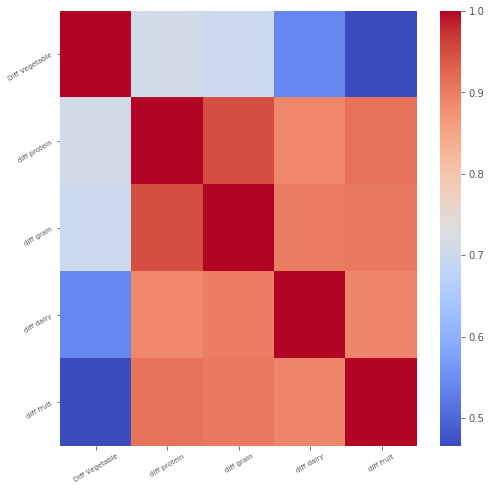

In [73]:
diffs = list(df_esrdonly.columns[:-1]) 
import seaborn as sns
s = sns.heatmap(df_esrdonly[diffs].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_how_in_together_influencing_PCA_components' + '.png')            
plt.show()

Vegetable by itself is important - contributing factors

protein + grain + then fruit

grain with fruit -- slighly with dairy

dairy with protein and grain*

fruit with protein and grain then dairy


# References

https://www.kaggle.com/etakla/exploring-the-dataset-univariate-analysis
https://www.kaggle.com/etakla/exploring-the-dataset-bivariate-analysis
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
https://lifelines.readthedocs.io/en/latest/
https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
https://www.statsdirect.com/help/survival_analysis/cox_regression.htm
https://courses.lumenlearning.com/suny-natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas

#ref https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
#



https://www.pearsonhighered.com/gould-statistics-2e-info/assets/pdf/sample-chapter-ess-ch04.pdf
    
https://www.kaggle.com/amanajmera1/linear-regression-model-on-nba-dataset
    
https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/ch04.html
    
http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/
    
https://www.graphpad.com/support/faq/what-is-the-difference-between-correlation-and-linear-regression/
    
    
https://www.statsdirect.com/help/regression_and_correlation/simple_linear.htm
    
    
https://erc.barnard.edu/spss/pearsons_r
    
    
https://www.statpac.com/statistics-calculator/correlation-regression.htm
    
https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/
    
https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression
    
https://www.statisticssolutions.com/bivariate-correlation/
    
https://data-flair.training/blogs/python-statistics/
    

https://www.kaggle.com/naina04/bivariate-plotting-with-pandas
    
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751
    
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
    
https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
    
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas
    
    

# Note to help with re-generating the data
# To include oil and sugar recommendation amount, the sql as below was used.
# also for other food groups
#/****** Script for SelectTopNRows command from SSMS  ******/

Stored Procedure: [find_recommended_amounts_for_food_groups]
    

SELECT [age]
      ,[food_group]
      ,[average_taken]
      ,[recommended_low]
      ,[recommended_high]
  FROM [mrp_experiment_phase_data_process].[dbo].[age_food_group_recommended_amount]
  where age in ( select '1' union select age_groups.[from] from age_groups)
  and food_group in ('Fats, oils, and salad dressings', 'Sugars, sweets, and beverages')
  order by food_group

    

The python file: for_each_age_recommended_amount_take_from_related_group.ipynb  helped to generate the recommended amounts based on health.gov data
Where for_each_age_recommended_amount.ipynb was the earlier versions : there are some changes in the approch
    

The study as below also the recommendations from health.gov was used for the recommended amount calculations
https://health.gov/dietaryguidelines/2015/guidelines/chapter-2/a-closer-look-at-current-intakes-and-recommended-shifts/#figure-2-7-desc-toggle

For sugar recommended amounts: multiple sources were used.
The article above and health.gov recommendations were used.
health.gov recommends 10% of calory from sugar using the recommended calory intake per day
Other articles were also. check the ipynb files and notes there


Folders such as: input_csvdietfiles, output_agescsvdietfiles are related to recommendation amount calculations from health.gov or shift_recommendation article data